# Unravelling mental representations in aphantasia through unsupervised

alignment

Project design and data analysis simulation

Maël Delem  
2/02/2024

Research on aphantasia is confronted with a long-standing conundrum of all research on consciousness and representations, namely the theoretical inaccessibility of subjective representations. Drawing on concepts from similarity and representation research, I endorse the view that the study of an individual’s mental representations is made possible by exploiting second-order isomorphism. The concept of second-order isomorphism means that correspondence should not be sought in the first-order relation between (a) an external object and (b) the corresponding internal representation, but in the second-order relation between (a) the perceived similarities between various external objects and (b) the similarities between their corresponding internal representations. Building on this idea, this study project report is divided into five parts. **First**, I outline the central ideas underlying similarity research and its applicability to aphantasia research. **Second**, I present a methodological rationale and protocol based on inverse multidimensional scaling that can be implemented online to conduct such large-scale research with high efficiency. **Third**, I present a data analysis plan using a state-of-the-art method for similarity analysis, unsupervised alignment with Gromov-Wasserstein optimal transport (GWOT). **Fourth**, I report a data simulation of a potential outcome of this project and the successful analysis of this synthetic data using GWOT alignment. **Fifth**, I analyse the feasability of such a project given the material constraints of my thesis. I conclude with the expected utility and benefits of this project.

> **Project inception**
>
> This project stems from several elements:
>
> 1.  The long standing knowledge of the fact that internal representations seem impossible to reach due to their subjective nature.
>
> 2.  The discovery of the article of Shepard and Chipman ([1970](#ref-shepardSecondorderIsomorphismInternal1970)) that expose the idea of “second-order isomorphism”.
>
> 3.  The discovery of state-of-the-art and accessible unsupervised analytic methods to study this principle in an astonishing way. The last two discoveries (and many more) are the fruit of amazing discussions and recommendations from Ladislas when he came here. These motivated me to try to implement GWOT in R on data that I wanted to create myself to emulate a study we could do.
>
> *I promise that I did this mostly on my spare time, we have too many other things to do elsewhere.*

# 1. Theoretical context

## 1.1 Psychological spaces and aphantasia

While attempting to demonstrate the uselessness of the concept of similarity as a philosophical and scientific notion[1], Goodman ([1972](#ref-goodmanSevenStricturesSimilarity1972)) has inadvertently expressed an aspect of similarity judgements of primary importance to us aphantasia researchers:

> Comparative judgments of similarity often require not merely selection of relevant properties but a weighting of their relative importance, and variation in both relevance and importance can be rapid and enormous. Consider baggage at an airport checking station. The spectator may notice shape, size, color, material, and even make of luggage; the pilot is more concerned with weight, and the passenger with destination and ownership. Which pieces are more alike than others depends not only upon what properties they share, but upon who makes the comparison, and when. . . . Circumstances alter similarities.

This can be easily reversed as an argument in favor of the **potential of similarity analyses to highlight the inter-individual differences in sensory mental representations**. For example, should we ask individuals to judge the similarities in shape or color between various objects, the *differences between the similarity structures* of individuals will be precisely the most important phenomenon for us, far less than the constancy between these structures. If we can account for the context dependence, as we will propose here with explicit instructions, clever task design, and hypothesis-neutral analysis, we could overcome the limitations of the inherently subjective nature of similarity judgements.

This idea of a difference in similarity judgements in aphantasia seems to transpire in the results of Bainbridge et al. ([2021](#ref-bainbridgeQuantifyingAphantasiaDrawing2021)) on their drawing study. They have shown that aphantasics had more schematic representations during recall, accurate in their spatial positioning, but with less sensory details. This difference can be seen from two perspectives: (1) a memory deficit for sensory properties; (2) a different representational structure of the items in their psychological spaces. In the latter case, aphantasics would have greater/faster abstraction of their representation of a perceived scene, reducing the amount of encoded sensory details unconsciously considered to be relevant. Both (1) and (2) can theoretically explain the same behavioural response, i.e. less sensory elements and correct spatial recall accuracy in aphantasic drawings, but **the two have drastically different consequences on how we define, characterize, and judge aphantasia.**

The dominant hypothesis seems to be that aphantasics simply have an episodic or general memory deficit. Conversely, I hypothesize that aphantasics have different representational structures than phantasics in certain dimensions of their psychological spaces (notably sensory, but potentially abstract too). More generally, I hypothesize that the concept of visual imagery evaluates in reality the continuous spectrum of representational structures in *sensory* dimensions of psychological spaces. Mirroring visual imagery, spatial imagery could also be a rough psychometric evaluation of the continuous spectrum of structural differences in *conceptual/abstract* dimensions of psychological spaces. In this view, the psychological space of aphantasics would constrain internal representations to particularly abstract forms from a very early stage, thus selectively limiting the item properties thereafter encoded in long-term memory. In other terms, **I hypothesize that aphantasia would not be characterized by an episodic memory deficit, but by an episodic memory *selectivity* caused by the specific characteristics of their representational structures and psychological spaces.** This selectivity would have, as we already hypothesized several times, benefits and drawbacks.

Gardenfors ([2004a](#ref-gardenforsConceptualSpacesFramework2004)) proposed that differences in psychological (in his terms, conceptual) spaces could arise from various sources, whether innate, due to learning, or broader cultural or social differences. All these hypotheses could be coherent to explain the sources of aphantasia. Nevertheless, the study of these sources should be the subject of very large-scale or longitudinal studies, which are out of the scope of this project.

Here, we shall rather attempt to **develop a method to characterize the differences in aphantasics’ representational structures and psychological spaces.**

# 2. Methodology

Roads and Love ([2024](#ref-roads2024)), in a recent review on the state and perspectives of similarity research, highlighted two challenges that studies in this field had to face: (1) The high cost of collecting behavioral data on a large number of stimuli; (2) The lack of software packages being a high barrier to entry, making the task of coding models difficult for the uninitiated.

To solve these problems, we present here two solutions, respectively for (1) experimental design and (2) data analysis:

1.  A recent method to efficiently acquire similarity judgements, the “multiple arrangement of items” and “inverse multidimensional scaling” developed by Kriegeskorte and Mur ([2012](#ref-kriegeskorteInverseMDSInferring2012)).
2.  An accessible and robust Python toolbox provided by Sasaki et al. ([2023](#ref-sasakiToolboxGromovWassersteinOptimal2023)) to conduct unsupervised alignment analysis using Gromov-Wasserstein optimal transport.

## 2.1 Experimental design

### Multi-arrangement and inverse multidimensional scaling

Assuming a geometric model of representational similarities, Kriegeskorte and Mur ([2012](#ref-kriegeskorteInverseMDSInferring2012)) developed a multi-arrangement (MA) method to efficiently acquire (dis)similarity judgments for large sets of objects. The subject has to perform multiple arrangements of item subsets adaptively designed for optimal measurement efficiency and for estimating the representational dissimilarity matrix (RDM) by combining the evidence from the subset arrangements.

The procedure is illustrated in <a href="#fig-multi-arrangement" class="quarto-xref">Figure 2.1</a>.

<figure id="fig-multi-arrangement">
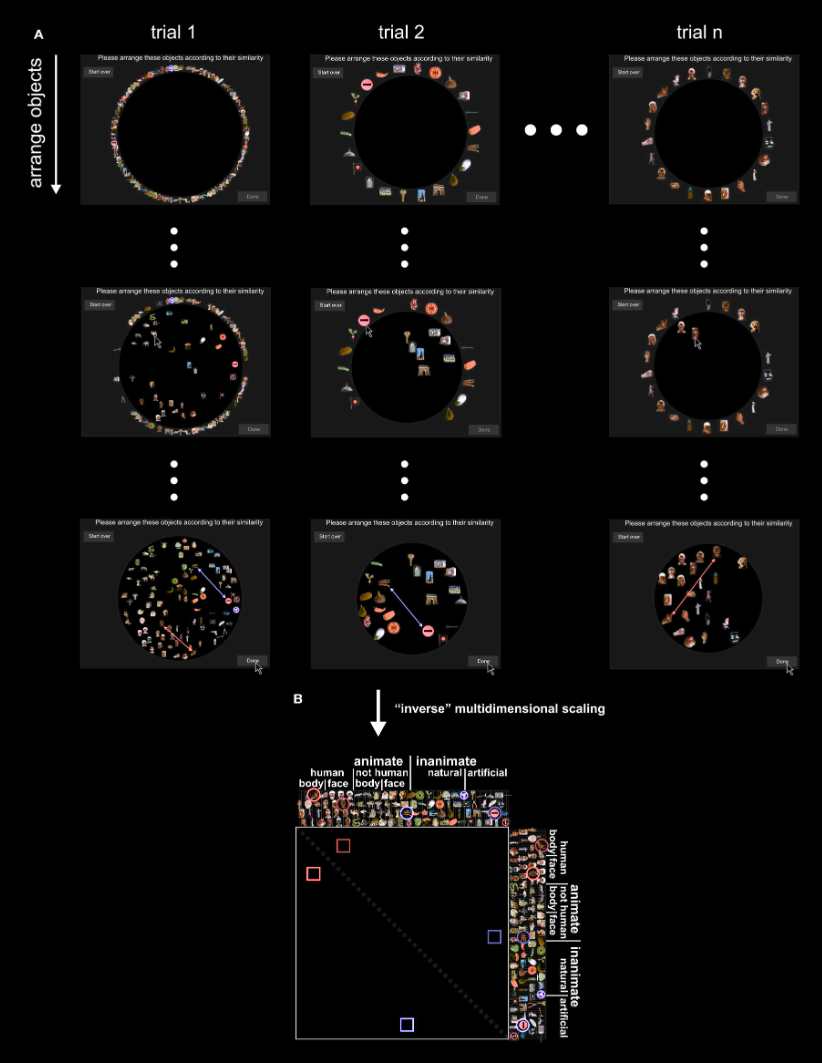
<figcaption>Figure 2.1: <strong>Acquiring similarity judgements with the multi-arrangement method. (A)</strong> Subjects are asked to arrange items according to their similarity, using mouse drag-and-drop on a computer. The similarity measure is taken as the distances between the items: similar items are closer, while dissimilar items are further apart. The upper part of the figure shows screenshots at different moments of the acquisition for one subject. Columns are trials and rows show the object arrangements over time, running from the start (top row) to the end (last row). The first trial contains all items; subsequent trials contain subsets of items that are adaptively selected to optimally estimate judged similarity for each subject. <strong>(B)</strong> Once acquisition of the final judgements is completed, inter-item distances in the final trial arrangements are combined over trials by rescaling and averaging to yield a single dissimilarity estimate for each object pair. The process is illustrated in this figure for two example item pairs: a boy’s face and a hand (red), and carrots and a stop sign (blue). Their single-trial dissimilarity estimates (arrows) are combined into a single dissimilarity estimate, which is placed at the corresponding entry of the RDM (lower panel). Mirror-symmetric entries are indicated by lighter colors <span class="citation" data-cites="murHumanObjectSimilarityJudgments2013">(figure from <a href="#ref-murHumanObjectSimilarityJudgments2013" role="doc-biblioref">Mur et al. 2013</a>)</span>.</figcaption>
</figure>

A key strength of this method that sets it as particularly effective is the “adaptive” part. The goal of the process is to acquire similarity judgements as precisely as possible while minimizing the total amount of trials. To do so, starting from the second trial, selected subsets of the items to be compared are presented to the subject: these items are the ones that were very close on-screen in previous trials and thus had their distance evaluated with lower accuracy by the subject. As the subject has to fill the entire “arena” with the items, these subsequent trials will necessarily increase the level of precision in the similarity judgement between pairs of items. The second key benefit of this method is the time and effort gain compared to others. For example, to compare every pair of items among 64 different items would require $\frac{64 \times (64-1)}{2} = 2016$ comparisons (i.e. trials). This would be extremely time-consuming, while also losing the *context-independence* afforded by the MA method due to the presence of other items around every time the subject mentally performs a pairwise comparison.

Historically, when referring to the projection of the representations of stimuli (e.g., coordinates in geometric space) from a high-dimensional space into a lower-dimensional space, inference algorithms were commonly called multidimensional scaling ([Roads and Love 2024](#ref-roads2024)). By analogy, the process of combining several lower-dimensional (2D) similarity judgements on-screen to form one higher dimensional similarity representation (in the RDM) can be conceptually seen as “inverse” multidimensional scaling, hence the name given to the method by Kriegeskorte and Mur ([2012](#ref-kriegeskorteInverseMDSInferring2012)).

### Principle

The idea is simple: for a given set of items that have distinct and very pictorial visual properties, we would ask a wide range of aphantasics, phantasics or hyperphantasics to imagine, mentally compare and make similarity judgements between the items. To compare these representations with actual perceptual representations, the subjects would also perform the same task afterwards, this time with actual pictures to compare. Subjects would also fill our usual psychometric imagery questionnaires.

To “compare imagined items”, we could use a “word” version of the MA paradigm. An example from Majewska et al. ([2020](#ref-majewskaSpatialMultiarrangementClustering2020)) - *who used the method to build large-scale semantic similarity resources for Natural Language Processing systems* - is represented in <a href="#fig-majewska" class="quarto-xref">Figure 2.2</a>.

<figure id="fig-majewska">
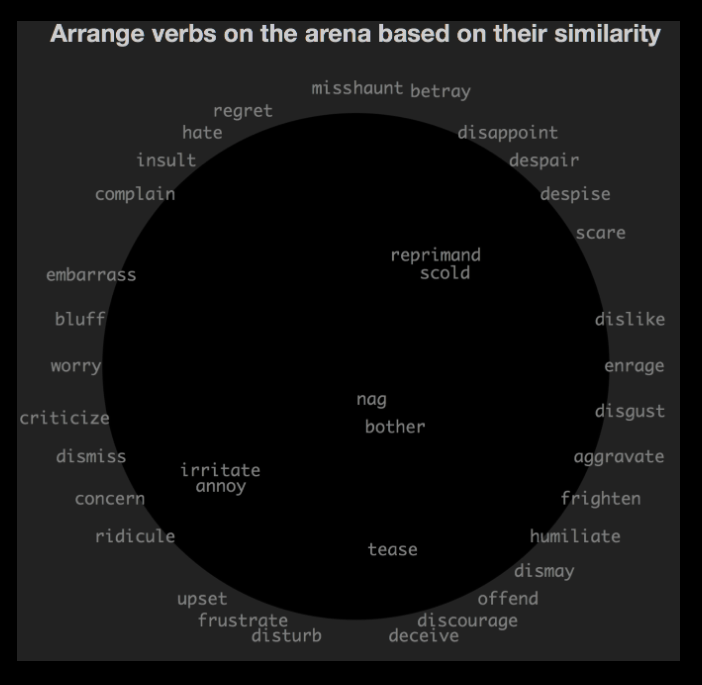
<figcaption>Figure 2.2: Arena layout of the MA protocol used by to acquire similarity judgements on word pairs <span class="citation" data-cites="majewskaSpatialMultiarrangementClustering2020">(figure from <a href="#ref-majewskaSpatialMultiarrangementClustering2020" role="doc-biblioref">Majewska et al. 2020</a>)</span>.</figcaption>
</figure>

We could have the stimuli rated by another set of participants on several features.

> « *We deliberately did not specify which object properties to focus on, to avoid biasing participants’ spontaneous mental representation of the similarities between objects. Our aim was to obtain similarity judgments that reflect the natural representation of objects without forcing participants to rely on one given dimension. However, participants were asked after having performed the task, what dimension(s) they used in judging object similarity.* » ([Jozwik, Kriegeskorte, and Mur 2016](#ref-jozwik2016))

> « ***All but one of the 16 participants reported arranging the images according to a categorical structure.*** » ([Jozwik et al. 2017](#ref-jozwik2017))

This result of Jozwik et al. ([2017](#ref-jozwik2017)) suggests that we should give an explicit instruction about the features to focus on, otherwise everyone might bypass visual features and mental images in favour of concepts and categories, regardless of their mental imagery profile.

In contrast, if we ask to focus specifically on the visual features, then ask subjects about the strategy they used to evaluate the similarities, then on the subjectively felt mental format of these strategies, we might grasp better insight on the sensory representations of subjects.

We could even go for several comparisons - even though this would increase quadratically the number of trials - e.g. :

-   Evaluate to what extent the **shape** *of these animals are* ***similar*** **at rest, ignoring size differences.**

-   Evaluate to what extent these animals **sound like each other.**

-   Etc.

> *Note to be added: if you do not know the animal, just guess its placement, as this situation is quite unlikely to happen (animals chosen are fairly common knowledge).*

Kawakita et al. ([2023](#ref-kawakita2023)): To assess whether the color dissimilarity structures from different participants can be aligned in an unsupervised manner, we divided color pair similarity data from a large pool of 426 participants into five participant groups (85 or 86 participants per group) to obtain five independent and complete sets of pairwise dissimilarity ratings for 93 color stimuli (Fig. 3a). Each participant provided a pairwise dissimilarity judgment for a randomly allocated subset of the 4371 possible color pairs. We computed the mean of all judgments for each color pair in each group, generating five full dissimilarity matrices referred to as Group 1 to Group 5.

### Stimuli

We would have a list of animal items, that would have several characteristics:

-   A name

-   A category

-   A shape

We need orthogonal data:

-   Each class of animal should include each shape (roughly)

-   Each shape should have an animal

This would imply that category cannot be derived from shape, and vice-versa. Thus, a **sorting by shape would reveal to be innately visual** (or maybe spatial, if shape concerns this type of imagery), and a **sorting by category would reveal an abstraction** from these shapes. We expect that the two will be mixed to some degree in every subject, but that low-imagery would rather tend towards category sorting, while high-imagery would tend towards shape sorting.

Shapes could be very tricky stimuli to discuss. Gardenfors ([2004b](#ref-gardenfors2004)) noted that we only have a very sketchy understanding of how we perceive and conceptualize things according to their shapes. The works of Marr, Nishihara, and Brenner ([1997](#ref-marr1997)) highlight this difficulty when analysing the complexity of the hierarchical judgements of shapes and volumes, as shown in <a href="#fig-marr" class="quarto-xref">Figure 2.3</a>.

<figure id="fig-marr">
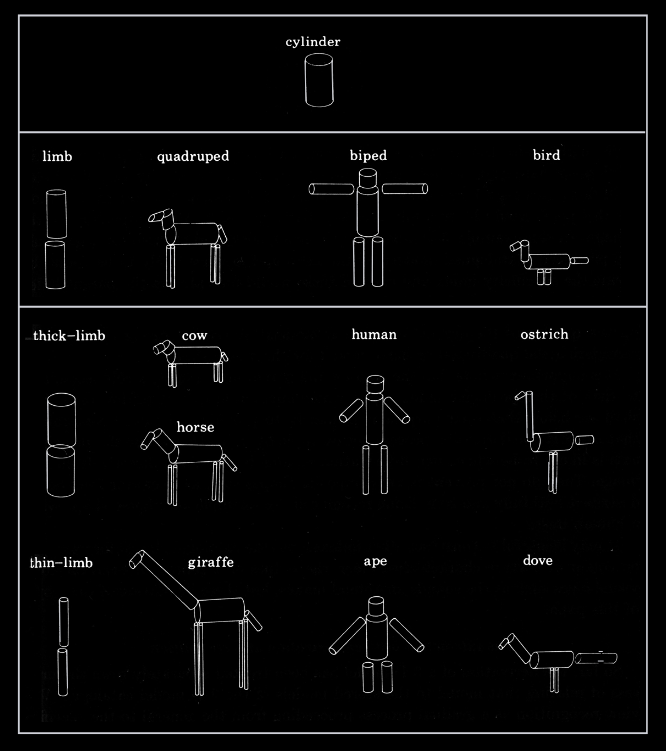
<figcaption>Figure 2.3: Representing the characteristics of shapes with cylinders <span class="citation" data-cites="marr1997">(figure from <a href="#ref-marr1997" role="doc-biblioref">Marr, Nishihara, and Brenner 1997</a>)</span>.</figcaption>
</figure>

# 3. Data analysis plan

## 3.1 Unsupervised alignment rationale

Visual images can be represented as points in a multidimensional psychological space. Embedding algorithms can be used to infer latent representations from human similarity judgments. While there are an infinite number of potential visual features, an embedding algorithm can be used to identify the subset of salient features that accurately model human-perceived similarity. (*From Roads’ CV*)

Using an optimization algorithm, the free parameters of a psychological space are found by maximizing goodness of fit (i.e., the loss function) to the observed data. Historically, when referring specifically to the free parameters that correspond to the representation of stimuli (e.g., coordinates in geometric space), inference algorithms were commonly called multidimensional scaling (MDS), or simply scaling, algorithms.

In the machine learning literature, analogous inference algorithms are often called embedding algorithms. The term “embedding” denotes a higher-dimensional representation that is embedded in a lower-dimensional space. For that reason, the inferred mental representations of a psychological space could also be called a psychological embedding.

Numerous techniques exist, and each has limitations. Popular techniques for comparing representations include RSA Kriegeskorte, Mur, and Bandettini ([2008](#ref-kriegeskorte2008)) and canonical correlation analysis (CCA) (Hotelling 1936). Briefly, RSA is a method for comparing two representations that assesses the correlation between the implied pairwise similarity matrices. CCA is a method that compares two representations by finding a pair of latent variables (one for each domain) that are maximally correlated.

One might be tempted to compare two dissimilarity matrices assuming stimulus-level “external” correspondence: my “red” corresponds to your “red”(Fig. 1d). This type of supervised comparison between dissimilarity matrices, known as Representational Similarity Analysis (RSA), has been widely used in neuroscience to compare various similarity matrices obtained from behavioural and neural data. However, there is no guarantee that the same stimulus will necessarily evoke the same subjective experience across different participants. Accordingly, when considering which stimuli evoke which qualia for different individuals, we need to consider all possibilities of correspondence: my “red” might correspond to your “red”, “green”, “purple”, or might lie somewhere between your “orange” and “pink”(Fig. 1e). Thus, we compare qualia structures in a purely unsupervised manner, without assuming any correspondence between individual qualia across participants.

## 3.2 Gromov-Wasserstein optimal transport

To account for all possible correspondences, we use an unsupervised alignment method for quantifying the degree of similarity between qualia structures. As shown in Fig. 2a, in unsupervised alignment, we do not attach any external (stimuli) labels to the qualia embeddings. Instead, we try to find the best matching between qualia structures based only on their internal relationships (see Methods). After finding the optimal alignment, we can use external labels, such as the identity of a color stimulus (Fig. 2b), to evaluate how the embeddings of different individuals relate to each other. This allows us to determine which color embeddings correspond to the same color embeddings across individuals or which do not. Checking the assumption that these external labels are consistent across individuals allows us to assess the plausibility of determining accurate inter-individual correspondences between qualia structures of different participants.

To this end, we used the Gromov-Wasserstein optimal transport (GWOT) method, which has been applied with great success in various fields. GWOT aims to find the optimal mapping between two point clouds in different domains based on the distance between points within each domain. Importantly, the distances (or correspondences) between points “across” different domains are not given while those “within” the same domain are given. GWOT aligns the point clouds according to the principle that a point in one domain should correspond to another point in the other domain that has a similar relationship to other points. The principle of the method is illustrated in <a href="#fig-gwot-kawa" class="quarto-xref">Figure 3.1</a>

<figure id="fig-gwot-kawa">
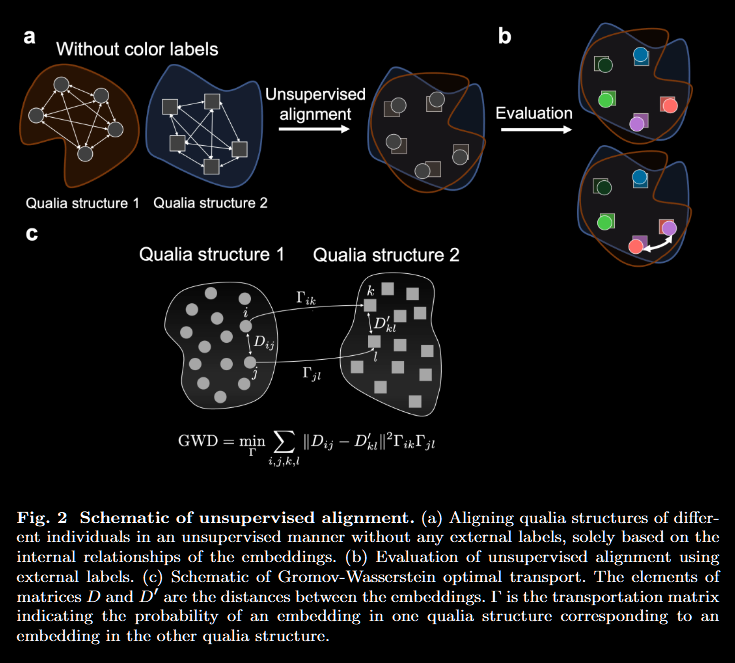
<figcaption>Figure 3.1: Gromov-Wassertein optimal transport principle <span class="citation" data-cites="kawakita2023">(figure from <a href="#ref-kawakita2023" role="doc-biblioref">Kawakita et al. 2023</a>)</span>.</figcaption>
</figure>

We first computed the GWD for all pairs of the dissimilarity matrices of the 5 groups (Group 1-5) using the optimized $\epsilon$. In Fig. 3b, we show the optimized mapping $\Gamma*$ between Group 1 and Groups 2-5 (see Supplementary Figure S1 for the other pairs). As shown in Fig. 3b, most of the diagonal elements in $\Gamma*$ show high values, indicating that most colors in one group correspond to the same colors in the other groups with high probability. We next performed unsupervised alignment of the vector embeddings of qualia structures. Although $\Gamma*$ provides the rough correspondence between the embeddings of qualia structures, we should find a more precise mathematical mapping between qualia structures in terms of their vector embeddings to more accurately assess the similarity between the qualia structures. Here, we consider aligning the embeddings of all the groups in a common space.

By applying MDS, we obtained the 3-dimensional embeddings of Group 1 and Groups 2-5, referred to as X and Yi, where i = 2, …, 5 (Fig. 3c). We then aligned Yi to X with the orthogonal rotation matrix Qi, which was obtained by solving a Procrustes-type problem using the optimized transportation plan $\Gamma*$ obtained through GWOT (see Methods). Fig. 3d shows the aligned embed- dings of Group 2-5 (QiYi) and the embedding of Group 1 (X) plotted in the embedded space of X. Each color represents the label of a corresponding external color stimulus. Note that even though the color labels are shown in Fig. 3d, this is only for the visualization purpose and the whole alignment procedure is performed in a purely unsupervised manner without relying on the color labels. As can be seen in Fig. 3d, the embeddings of similar colors from the five groups are located close to each other, indicating that similar colors are ‘correctly’ aligned by the unsupervised alignment method.

To evaluate the performance of the unsupervised alignment, we computed the k-nearest color matching rate in the aligned space. If the same colors from two groups are within the k-nearest colors in the aligned space, we consider that the colors are correctly matched. We evaluated the matching rates between all the pairs of Groups 1-5. The averaged matching rates are 51% when k = 1, 83% when k = 3, and 92% when k = 5, respectively. This demonstrates the effectiveness of the GW alignment for correctly aligning the qualia structures of different participants in an unsupervised manner.

However, as can be seen in Fig. 4b, the optimized mapping $\Gamma*$ is not lined up diagonally unlike the optimized map- pings between color-neurotypical participants groups shown in Fig. 3b (see Supplementary Figure S1 for the other pairs). Accordingly, top k matching rate between Group 1-5 and Group 6 is 3.0% when k = 1 (Fig. 4c), which is only slightly above chance ($\approx$ 1%). The matching rate did not improve even when we relaxed the criterion (6.9% and 11% for k = 3 and k = 5, respectively). Moreover, all of the GWD values between Group 1-5 and Group 6 are larger than any of the GWD values between color-neurotypical participant groups (Fig. 4d).

These results indicate that the difference between the qualia structures of neuro-typical and atypical participants is significantly larger than the difference between the qualia structures of neuro-typical participants.

<figure>
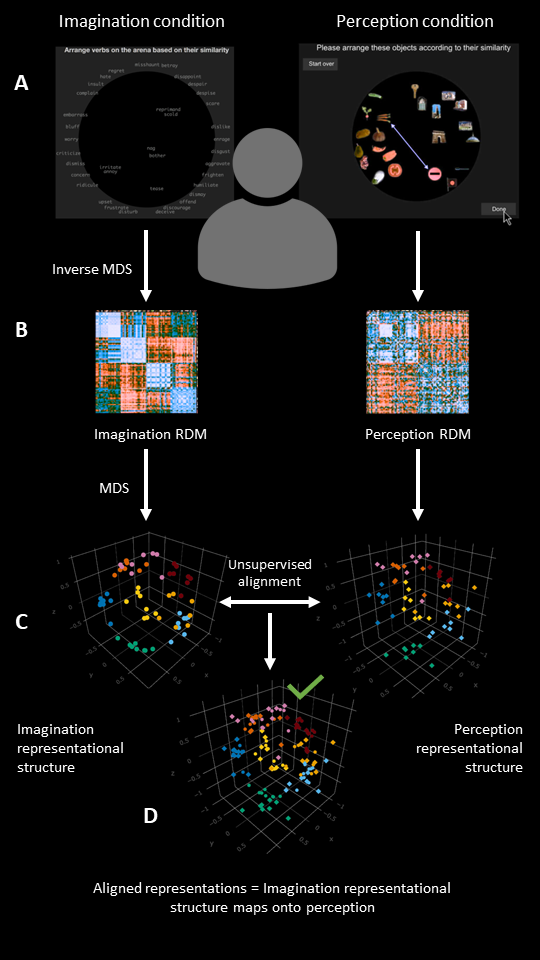
<figcaption aria-hidden="true">The two conditions for one subject.</figcaption>
</figure>

<figure>
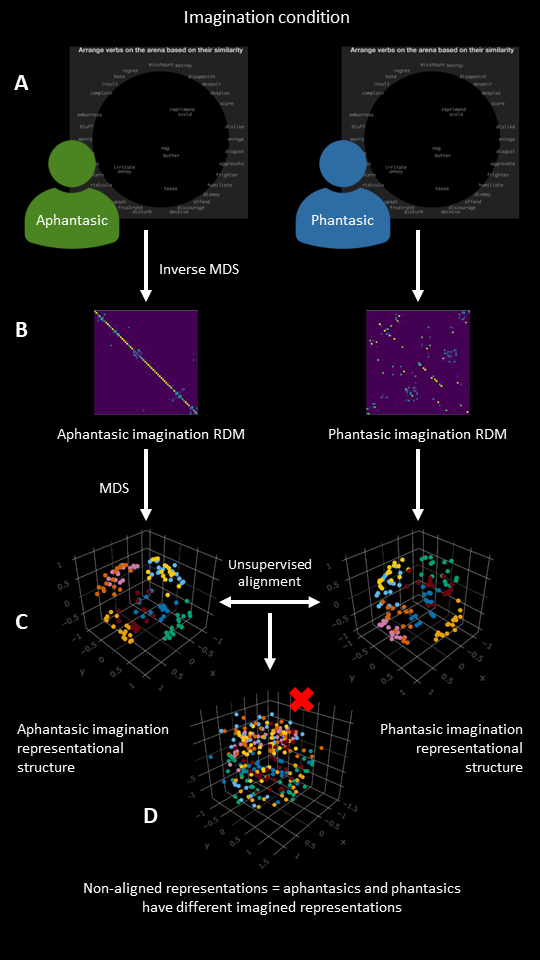
<figcaption aria-hidden="true">The comparison between the representational structure of aphantasics and phantasics. This figure illustrates the principle, but in reality all pairs of subjects will be compared to assess their representational structure alignment. This is computationnally heavy, but analytically very powerful.</figcaption>
</figure>

[1] A claim dismissed since then by propositions of robust mathematical models of similarity, e.g. Gardenfors ([2004a](#ref-gardenforsConceptualSpacesFramework2004)), Decock and Douven ([2011](#ref-decockSimilarityGoodman2011)).

## 3.3 Hypotheses

### Aphantasic and phantasic psychological spaces

The most representative members of a category are called prototypical members.

Prototype theory builds on the observation that among the instances of a property, some are more representative than others. The most representative one is the prototype of the property.

Thus, following the concepts illustrated by Gardenfors ([2004b](#ref-gardenfors2004)), we would expect that aphantasics, when doing shape similarity judgements, would be more inclined to group items close to the prototypical items due to a lower definition of the mental image. In comparison, phantasics would have a much more distributed conceptual space of item shapes due to their higher-resolution mental images of said items.

### Subjective imagery and psychological spaces

In the proposed view of visual imagery as the subjective expression of a given type of psychological space, we mentioned earlier that *spatial* imagery could also constitute a subjective expression of other dimensions of psychological spaces. Hence, the *verbal* dimension of the simplified model of imagery we outlined in my thesis project could also represent different dimensions.

This conception leads to the following theoretical hypothesis: provided that our visual-spatial-verbal model correctly fits subjective imagery, the imagery profile of individuals should map on their psychological spaces.

Operationally, this would be evaluated by the fact that **individuals with similar imagery profiles** (visual, spatial, verbal, or any combination of the three) **should have similar representations** in their given psychological space, **quantifiable by the degree of alignment between their similarity structures.**

# 4. Study simulation and analysis

In [ ]:
# ═══ Packages ═════════════════════════════════════════════════════════════════

if (!require(librarian)) install.packages(librarian) 

Le chargement a nécessité le package : librarian

## 4.1 Visual-spatial-verbal model of cognitive profiles

One of the objectives of the study would be to link the subjective cognitive profiles of individuals with their representational structures. To evaluate these profiles, we are going to use psychometric questionnaires evaluating the visual-object, spatial, and verbal dimensions of imagery which will yield three scores, one for each dimension.

We are going to simulate 30 participants presenting four different cognitive profiles, that I defined as, respectively, *verbal* aphantasics, *spatial* aphantasics, *spatial* phantasics, and *visual* phantasics. Their imagery abilities are summarised in <a href="#tbl-imageries" class="quarto-xref">Table 4.1</a>.

To simulate these four sub-groups, we use the `holodeck` R package to generate multivariate normal distributions of scores on these three dimensions for each sub-group. For instance, verbal aphantasics have normally distributed visual imagery scores centered around a mean of 0 (normalized, so negative scores are possible), 0.4 for spatial imagery, and 0.7 for verbal style; Spatial aphantasics have means of 0 for visual, 0.75 spatial, and 0.3 for verbal; etc. The numbers are arbitrary, but have been chosen by trial-and-error to obtain a model that is both well-defined and not exaggerated. The 30 subjects’ imagery profiles are represented in the three dimensional space of the visual-spatial-verbal dimensions in <a href="#fig-plot-osv-model" class="quarto-xref">Figure 4.1</a>.

| Cognitive profile  | Visual imagery | Spatial imagery | Verbal style |
|--------------------|:--------------:|:---------------:|:------------:|
| Verbal aphantasic  |       –        |       \-        |      ++      |
| Spatial aphantasic |       –        |       ++        |      \-      |
| Spatial phantasic  |       \+       |       ++        |      \-      |
| Visual phantasic   |       ++       |       \-        |      \+      |

Table 4.1: Imagery abilities of the four hypothesized cognitive profiles.

In [ ]:
plotting_osv_model <- function(df, grouping_variable, size){
  df |> 
    plot_ly(
      x = ~visual_imagery,
      y = ~spatial_imagery,
      z = ~verbal_profile,
      color = ~df[[grouping_variable]],
      text  = ~df[[grouping_variable]],
      colors = c("#E69F00", "#56B4E9", "#009E73", "#F5C710"),
      type = "scatter3d",
      mode = "markers+text",
      marker = list(size = size),
      textfont = list(size = size + 4)
    ) |> 
    layout(
      scene = list(
        xaxis = list(
          title = list(text = "Visual imagery", font = list(color = "grey")),
          tickfont = list(color = "grey")
          ),
        yaxis = list(
          title = list(text = "Spatial imagery", font = list(color = "grey")),
          tickfont = list(color = "grey")
          ),
        zaxis = list(
          title = list(text = "Verbal profile", font = list(color = "grey")),
          tickfont = list(color = "grey")
          )
      ),
      legend = list(title = list(text = "Group")),
      paper_bgcolor = "transparent"
      )
}

df |> 
  mutate(vis_spa_group = case_when(
    vis_spa_group == "aph_spa_high" ~ "Aph. spatial",
    vis_spa_group == "aph_spa_low"  ~ "Aph. verbal",
    vis_spa_group == "phant_spa_high" ~ "Phant. spatial",
    vis_spa_group == "phant_spa_low"  ~ "Phant. visual"
  )) |> 
  plotting_osv_model(grouping_variable = "vis_spa_group", size = 4)

## 4.2 Data simulation: Creating representational structures

Gardenfors ([2004b](#ref-gardenfors2004)) invokes two scientific concepts, to wit, prototypes and Voronoi tessellations. Prototype theory builds on the observation that among the instances of a property, some are more representative than others. The most representative one is the prototype of the property. *We hypothesize that aphantasics will be more inclined to categorize items according to prototypes than phantasics.*

A Voronoi tesselation of a given space divides that space into a number of cells such that each cell has a center and consists of all and only those points that lie no closer to the center of any other cell than to its own center; the centers of the various cells are called the generator points of the tesselation. This principle will underlie our data simulation, as we will build representations in a 3D space based on distances to “centroids”, namely, prototypes. These representations will thus be located inside of the tessellations around these prototypes, more or less close to the centroid depending on the subject’s representational structures.

### Generating “prototype” embeddings from a sphere

In [ ]:
# getting the centroids of each cluster
df_centroids <- 
  df_embeds |> 
  group_by(group) |> 
  summarise(
    x_centroid = mean(x),
    y_centroid = mean(y),
    z_centroid = mean(z)
  )

# adding them to the data
df_embeds_2 <- left_join(df_embeds, df_centroids, by = "group")

A function will be used to generate embeddings. These spherical embeddings are displayed in <a href="#fig-perfect-embeddings" class="quarto-xref">Figure 4.2</a> We get 8 nicely distributed clusters. We’ll retrieve the centroids of each cluster, which would be the “perfect” categories of each species group (say, generated by a computational model on categorical criteria).

``` python
generate_sphere <- function(n){
  z     <- 2*runif(n) - 1          # uniform on [-1, 1]
  theta <- 2*pi*runif(n) - pi      # uniform on [-pi, pi]
  x     <- sin(theta)*sqrt(1-z^2)  # based on angle
  y     <- cos(theta)*sqrt(1-z^2) 
  
  df <- tibble(x = x, y = y, z = z)
  
  return(df)
}

# 1000 random observations with embeddings uniformly distributed on a sphere
df_embeds <- generate_sphere(1000)

# Clustering the observations in 8 groups based on their coordinates
clusters <- Mclust(df_embeds, G = 8)

# adding the classification to the data
df_embeds <- df_embeds |> mutate(group = as.factor(clusters$classification))

# getting the centroids of each cluster
df_centroids <- 
  df_embeds |> 
  group_by(group) |> 
  summarise(
    x_centroid = mean(x),
    y_centroid = mean(y),
    z_centroid = mean(z)
  )

# adding them to the data
df_embeds_2 <- left_join(df_embeds, df_centroids, by = "group")
```

``` r
##| fig-subcap: 
##|   - "Generated spherical distribution of 1000 observations grouped in 8 equal clusers with Gaussian Mixture Clustering."
##|   - "Centroids of the 8 clusters created on the sphere."
##| layout-ncol: 2

# function for 3D plotting up to 8 groups (due to the palette)
plotting_3d <- function(df, size, opacity){
  df |> 
    plot_ly(
      type = "scatter3d",
      mode = "markers",
      x = ~x,
      y = ~y,
      z = ~z,
      color = ~paste0("Species group ", group),
      colors = pal_okabe_ito,
      marker = list(size = size, opacity = opacity)
    ) |> 
    layout(paper_bgcolor = "transparent")
}

plotting_3d(df_embeds, 3, 1) |> 
  layout(legend = list(
    yanchor = "top",
    y = 1,
    xanchor = "right",
    x = 0
    ))
```

<div class="plotly html-widget html-fill-item" id="htmlwidget-eef4ed524c6314f5320a" style="width:100%;height:464px;"></div>
<script type="application/json" data-for="htmlwidget-eef4ed524c6314f5320a">{"x":{"visdat":{"6d9813793c68":["function () ","plotlyVisDat"]},"cur_data":"6d9813793c68","attrs":{"6d9813793c68":{"mode":"markers","x":{},"y":{},"z":{},"marker":{"size":3,"opacity":1},"color":{},"colors":["#E69F00","#56B4E9","#009E73","#F5C710","#0072B2","#D55E00","#CC79A7","#6c0009"],"alpha_stroke":1,"sizes":[10,100],"spans":[1,20],"type":"scatter3d"}},"layout":{"margin":{"b":40,"l":60,"t":25,"r":10},"paper_bgcolor":"transparent","legend":{"yanchor":"top","y":1,"xanchor":"right","x":0},"scene":{"xaxis":{"title":"x"},"yaxis":{"title":"y"},"zaxis":{"title":"z"}},"hovermode":"closest","showlegend":true},"source":"A","config":{"modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"data":[{"mode":"markers","x":[-0.13239110675415397,-0.45159860351329051,-0.31487681390159372,-0.085003018850043882,0.58344599831260291,0.53164026603293146,-0.074005276178948878,0.68031600673981407,0.64780855607643661,0.28362949714156144,-0.42341213745322459,-0.027180616195265819,-0.20439863013459308,0.25238462068380124,0.16848943661077739,-0.07960487175964448,0.026208499843948015,-0.06564996062258846,0.34373562954949255,-0.06604418411549294,-0.23548909389334224,0.18234766371200287,0.79916780432347678,0.33415105451981736,0.30148812414276333,0.4913640139399324,0.62001834407691747,0.41842229486310428,0.29145078789014034,0.43707951226602343,-0.23190578043204563,0.70502069075777707,-0.27871661727152236,-0.43181351039068472,-0.31577147635498343,0.63447743385781685,0.31121847977313788,0.60427661819583955,0.60445720131157121,0.57953085134115467,-0.32507138590171447,0.15303987406060091,0.057993384266468787,0.045062107901133804,-0.053652009846162876,-0.47176154705243256,0.32074412038860739,0.84522754009514212,-0.13476396003623173,-0.34730726769211667,-0.088148489882537304,0.65218993149759963,0.80018260884080084,-0.34641051753381236,-0.22794509386249562,0.21297224552551861,-0.12106322579238896,-0.29184457808434128,-0.010150150635858397,-0.42731525996440844,0.25197637560160091,-0.49345480728870422,0.56706513664348324,-0.15336923669726854,0.077864964842693965,0.54188477092245568,-0.35708677927632992,0.22516837104748028,0.81464282027126345,-0.10454433162344923,0.40119199107757925,0.78481131330837373,0.4186362037652076,0.7151623518724135,0.51780082750692513,0.27651517547908028,0.070103943599883603,0.22609065198787912,0.39138034346451156,0.18494733239952382,-0.0043254833161863061,0.075261447011377561,0.40638703891906142,-0.45406913432745377,0.020271265184881627,0.43998676563928052,0.45553632207225681,0.40049071428452587,0.02559351334342096,-0.40625359852357917,0.52587272591773027,0.54827418816202267,0.054640540749457331,0.023391130156739603,-0.37124053235114596,-0.44909081273478796,0.44134434846132853,-0.18062827042603102,-0.03802730594107924,0.1791766437626518,-0.40705174346993905,-0.19386130441087246,0.50049697485053213,-0.39264218181674837,0.35250544929146632,0.16526018714599161,0.78208123804625429,-0.078406046305317514,0.26300901931730847,-0.17084433418217695,-0.13252017090444318,0.52901171314372297,-0.34093134385026985,0.14631095360929369,0.6541633236034895,0.35655571593547253,0.55695645634259883,-0.12952685487615989,0.55160103814060868,-0.38935734180429732,-0.11654745595928617,0.28369461660634887,0.55351142844594203,0.34556272355066003],"y":[0.69461805828454493,0.85661748245059721,0.67162718073664451,0.98113641975695132,0.57377434439359243,0.77856534496724228,0.98478935348468999,0.45818898292666521,0.65016624573490478,0.95557262227182693,0.84804206010377392,0.99855138149254674,0.90656687390288671,0.73419966982235019,0.75727398214409991,0.98511524357530356,0.99930926075406101,0.99167473500840453,0.76167388102779321,0.8777231341360523,0.97024179489137041,0.96649121595791454,0.54284734296202675,0.93684614262879173,0.95346816521554323,0.87068367388455692,0.7487990590586675,0.72207194370082817,0.80456244530769416,0.88237015670524044,0.97273418866194561,0.56428407664432945,0.95967355026668166,0.88626368933570643,0.80564318274806435,0.63457288666193656,0.92734799230089715,0.55219725297418165,0.79101418468787443,0.55277614909016337,0.65936564871157488,0.64280846217502641,0.93162878574101804,0.99206909364627793,0.64055115406341423,0.88166640961209819,0.93468621990439893,0.5250534161025513,0.98687060145270034,0.92889340129674292,0.97418275852979064,0.68682548079667849,0.40272030091290201,0.90797527463961203,0.96200043706938498,0.91780402790595772,0.98555317896058614,0.95644012903259246,0.99189212422209672,0.7060192552145762,0.91087736550648191,0.76298780083002349,0.82283501115138591,0.73622512223898207,0.94094277014119199,0.82461262889768039,0.76883844488509456,0.7322607722511153,0.43774482481768839,0.99448062912624069,0.89362392746706731,0.56024895629446048,0.73949587903923419,0.60812650366541865,0.47721480625167728,0.94189092617167736,0.99080305402702373,0.9713200918216075,0.89041185569834314,0.95681536739160844,0.76046029822286154,0.87076026530683803,0.89109075878619237,0.75147814582360295,0.98066411618426819,0.87701120861763571,0.84442040874338697,0.67158063984483629,0.99966748805140027,0.68912836206963368,0.84927852835149664,0.83525179262345117,0.73645672839488352,0.99909123206226624,0.81547370862383539,0.85618009610950474,0.8769379537999803,0.77168545030666647,0.79724400654095751,0.692009395425355,0.8608160389171331,0.97140537972488072,0.83182942222566181,0.76473067375182358,0.93249934776727872,0.96046432498073886,0.60656066896314942,0.97001937706919028,0.61653250372574475,0.98525297618510443,0.75065661064606448,0.58032505577095117,0.82030809008513772,0.9034950986571556,0.75599975082612247,0.72000652075897253,0.83031940081992195,0.73861467456285324,0.76754686083835799,0.76619031646024882,0.95333588751350662,0.93442433266122971,0.82449648443716927,0.84318984158337829],"z":[0.7070914707146585,0.2495299382135272,0.67064858321100473,-0.17362549528479576,0.57478149654343724,0.33345858985558152,0.15720416139811277,0.57204281911253929,0.39702383754774928,0.0802201465703547,0.31866412749513984,-0.046436544042080641,0.36926643922924995,0.63027997594326735,0.63098924374207854,0.15235163690522313,-0.026346079539507627,-0.11077591171488166,0.54927107691764832,0.47459484357386827,0.056353758554905653,0.18067666981369257,0.25816193129867315,0.10325879044830799,-0.0018354621715843678,0.021710500586777925,0.23425887851044536,0.55094000697135925,0.51743184076622128,0.17431123461574316,-0.0028119762428104877,0.42956874473020434,-0.03665684349834919,0.16755227604880929,0.50122593389824033,0.4413112704642117,0.20777092920616269,0.57439356064423919,-0.094488366506993771,0.59881760273128748,0.67791263107210398,0.75058382470160723,0.3587541957385838,-0.11733848415315151,0.76603895518928766,-0.010265714023262262,-0.1532477717846632,0.099545545876026154,0.089022980537265539,0.12858736654743552,0.20784079656004906,0.3208099938929081,0.44443689286708832,0.23575549619272351,-0.15032030222937465,0.33507997402921319,-0.11844250420108438,-0.007001558318734169,0.12667670799419284,0.56474638544023037,0.32681849878281355,0.41755474964156747,0.0371439796872437,0.6591285509057343,-0.32949013728648424,-0.16240353230386972,0.53044931683689356,0.64272339781746268,0.3804425629787147,-0.0088747404515743256,-0.20119955902919173,0.26493831258267164,0.52715232502669096,0.34456489374861121,0.71003403561189771,0.19073762325569987,0.1157356696203351,0.073622661642730236,-0.23235351080074906,0.22427402203902602,0.6493700216524303,0.4859138554893434,-0.20200701523572206,0.47864581644535065,-0.19464574754238129,-0.19303622981533408,0.28185250144451857,0.62336717266589403,-0.0031441068276762962,0.6000500931404531,0.046731760259717703,-0.041831298265606165,0.67427434958517551,-0.035630956292152405,0.44405303476378322,0.25548597797751427,-0.19024981278926134,0.60981554072350264,0.60245822928845882,0.69929873943328857,0.30545805813744664,-0.13707436993718147,0.23992205085232854,0.5109002972021699,0.078643973916769028,0.22404765337705612,0.14294436667114496,0.23003238905221224,0.74210102250799537,-0.00942265335470438,0.64726583193987608,0.61916834302246571,0.4591954443603754,0.40285197226330638,-0.023124074097722769,0.59536428470164537,0.019214535132050514,0.66156719718128443,0.32650897558778524,0.51122720912098885,0.27850920287892222,0.21533353440463543,-0.11760376580059528,0.41184620326384902],"marker":{"color":"rgba(230,159,0,1)","size":3,"opacity":1,"line":{"color":"rgba(230,159,0,1)"}},"type":"scatter3d","name":"Species group 1","textfont":{"color":"rgba(230,159,0,1)"},"error_y":{"color":"rgba(230,159,0,1)"},"error_x":{"color":"rgba(230,159,0,1)"},"line":{"color":"rgba(230,159,0,1)"},"frame":null},{"mode":"markers","x":[-0.66994383211692821,-0.052453368593047424,-0.19247689162043041,0.0025440193779171921,-0.58117563193307398,-0.46051180247090812,-0.88674585847460841,-0.47960252840374157,-0.55191466254910826,-0.75683951729796672,-0.65887265335422163,-0.37615104409049166,-0.76380036596668865,-0.65821720778645221,-0.1269606992209224,-0.78524509717486313,-0.35734876422688133,-0.5010513259333178,-0.017280247547737736,-0.44389416167861018,-0.82665757316445465,0.16087237576218427,0.018123745911111981,-0.84191350595625125,-0.86300940516322666,-0.83143359304088549,-0.25974613204540059,-0.50636991468544457,-0.4708629378163468,-0.028772101643624561,-0.22968376197744389,-0.55760635033088002,-0.077622951498624027,-0.028746269490968118,-0.17299535383320985,-0.50615866357549999,-0.76191343793594801,-0.77456107220794912,-0.87321416714428446,-0.12906285436388004,-0.41522371399817037,-0.72562459703840676,-0.38491528323343066,-0.81378616244147584,-0.36170405558547425,-0.52579760036001477,-0.12633222940582498,-0.85114215103560875,-0.52917275307541012,-0.18777951797029327,-0.15753257418146011,-0.22248068279392999,-0.69508380929420643,-0.42413033002267381,-0.61101273051111071,-0.28661690100593856,-0.60515666642851351,-0.20960890160678614,0.00108827202507456,-0.094433176798895319,-0.73113529537677513,-0.17465539408677089,-0.55854041485550665,0.10375613478528357,-0.20356013172517903,-0.36004925592268561,0.03182785423069074,-0.64279743875332185,-0.84949491867905635,-0.5644529692334932,-0.62294345096699166,-0.86543438053825916,-0.089296500369111825,-0.48448404782468218,-0.56245687376034392,-0.52589353190004862,-0.42870545752429084,-0.54520163101918762,-0.46619550573937152,-0.40780293620774855,-0.45035085346467751,-0.041258881931528074,-0.41178626060531087,-0.5664602687870095,-0.18174333933342565,-0.66942787663796843,0.11315570217131926,-0.66498795437432456,-0.40247634663807802,-0.62777056857218372,-0.71368125864437149,-0.05356074680931374,-0.57521079096489114,-0.6473779745854592,-0.23853578212112045,0.074073165226112625,-0.53177464797858709,-0.86685741924079462,-0.40516466687745334,-0.50225233687564519,0.091328086048168305,-0.52207650747747181,-0.78214263945355489],"y":[0.48648834153709763,0.62915671228549563,0.84806208629084112,0.82133264147320173,0.39556778903067508,0.041772419568969058,0.24188232168192442,0.49385705949888431,0.037945645015943053,0.12587634525417216,0.5476076704349544,0.16397190143470464,0.28238093594881403,0.59633245966580095,0.67973305166320042,0.21913894467543299,0.87545334244020034,0.85418588881413771,0.69527467959445366,0.15444506271161898,0.46189113993177533,0.84192020481537921,0.84294429950047434,0.17991311816447123,0.29880161478978562,0.49072417190027251,0.88168083654345397,0.81625568077319721,0.88091348314276041,0.50780429809194194,0.53319237404992281,-0.039432911530244891,0.50522757455455969,0.93368091463261982,0.59358700095778738,0.25060592788517005,0.18548206168068745,0.3164341520760503,0.16364235892610429,0.39367675330510254,0.88725361966978844,0.5930721455544421,0.45897471695358749,0.25427118242436381,0.28118958287023116,0.12717851138136096,0.32812800154676403,0.029327527447513751,0.64700352800229222,0.78874539670430455,0.17585704926825452,0.74038168211044653,0.56614858009624081,0.19191207271850913,0.68734907491208597,0.68780454268358648,0.60114142490796452,0.89347652879467565,0.54830900749996936,0.33155722975505364,0.30249904486544837,0.93139830109923305,0.54246795613079601,0.84246925334748557,0.52219482141453888,0.74953665974325945,0.73760175154374408,0.35812762153797034,0.27844852837998779,0.82014404066914204,0.34935384146444948,0.24206669823018259,0.80650161641372697,0.46580865347811629,0.68554096990515856,0.63804591996624349,0.89036276267930436,0.010426030652206245,0.28274003761542399,0.86576298710064648,0.66777144345192951,0.80201702662716057,0.17411840046684401,0.56867320515669406,0.062243718149262175,0.68205686773634111,0.84971724320549658,0.28454643198255475,0.49746439985583485,0.76359079873433977,0.46220284606544365,0.81480123042355568,0.3313546446193581,0.68247637474707301,0.56775524270092304,0.7676848383702839,0.19850650815620285,0.15187881300588277,0.86707281432154881,0.75652090836520969,0.88810432145047025,0.3638714676467627,0.53606640271675998],"z":[-0.56080687884241343,-0.77550659282132983,-0.4937037006020546,-0.57044387981295586,-0.7111687627620995,-0.88667014427483082,-0.39392223209142685,-0.72531828843057156,-0.83303681388497353,-0.64136502146720886,-0.51576415728777647,-0.91193399298936129,-0.58040503785014153,-0.45949723059311509,-0.72238767938688397,-0.57910988619551063,-0.3253971510566771,-0.13897494785487652,-0.71853636857122183,-0.88266907492652535,-0.3213935773819685,-0.51506353728473186,-0.53769548796117306,-0.5087365903891623,-0.4073479613289237,-0.26059157215058804,-0.39391731284558773,-0.27805785927921534,-0.047744413372129202,-0.86099184723570943,-0.81421819049865007,-0.82916838070377707,-0.8594880891032517,-0.356950419023633,-0.78595615644007921,-0.82522728759795427,-0.62055162386968732,-0.54765369789674878,-0.45904051745310426,-0.91014361148700118,-0.20092357182875276,-0.34890453470870852,-0.8007386801764369,-0.52258802857249975,-0.88887715386226773,-0.84104845859110355,-0.93614752171561122,-0.52411538315936923,-0.54896505549550056,-0.58533712662756443,-0.97172927623614669,-0.63430064683780074,-0.44309624610468745,-0.88503289176151156,-0.39270178554579616,-0.66691503440961242,-0.52193332556635141,-0.39719491545110941,-0.83627510303631425,-0.93869706429541111,-0.6115026636980474,-0.31936295656487346,-0.62750388169661164,-0.5286588896997273,-0.82817621389403939,-0.55548116890713573,-0.67448546597734094,-0.67716767452657223,-0.44813480135053396,-0.093576696235686541,-0.69992381753399968,-0.43866507336497307,-0.58444955106824636,-0.7404711376875639,-0.46225084504112601,-0.56243523815646768,-0.15318544814363122,-0.83824010845273733,-0.83828385500237346,-0.29008828895166516,-0.59267647843807936,-0.59587447810918093,-0.89449139637872577,-0.5964340278878808,-0.98137407656759024,-0.29438876872882247,-0.51495280722156167,-0.69052469078451395,-0.7684672805480659,-0.15110660251230001,-0.52633410505950451,-0.57726094732061028,-0.74788812361657619,-0.3393048127181828,-0.78787985444068909,-0.63653213204815984,-0.82329271221533418,-0.47485896944999695,-0.28987295040860772,-0.41883016284555197,-0.45047740777954459,-0.7713842592202127,-0.31762509886175394],"marker":{"color":"rgba(86,180,233,1)","size":3,"opacity":1,"line":{"color":"rgba(86,180,233,1)"}},"type":"scatter3d","name":"Species group 2","textfont":{"color":"rgba(86,180,233,1)"},"error_y":{"color":"rgba(86,180,233,1)"},"error_x":{"color":"rgba(86,180,233,1)"},"line":{"color":"rgba(86,180,233,1)"},"frame":null},{"mode":"markers","x":[-0.025565098424453654,0.33952472005888612,0.67013930545249623,0.48116447415344499,0.94673470442218266,0.61791325789224749,0.85411203172821559,0.94099532709126033,0.68330043708473864,0.58109891156350879,0.66041368386924537,0.80948720925373252,0.83156468095230762,0.63610552696468303,0.83124557036338587,0.74844808007213948,0.75603820546420308,0.58375864152368628,0.083702730264978153,0.58253618053925305,0.031845834803076581,0.8194099378721873,0.028804957493756993,0.61289189264766364,0.36883761707353829,0.62740225978480424,0.34669854632830749,0.33833555254289294,0.67294445141408488,0.77565345252542472,0.40182533878647969,0.45919512710807198,0.74831417181014315,0.59620416903133755,0.23954549653651175,0.17946844584284663,0.70002275429085925,0.49566088670602226,0.33700559601475766,0.63066569688775242,0.25082785843282379,0.69988234814445505,0.46631380903895991,0.67128710350616461,0.94679217081875389,0.53469045088494482,0.599857892623606,0.93854643547849215,0.82743548672509548,0.36306281533464663,0.57500054195519779,0.58801968222083967,0.79892623740902013,0.33228166348216448,0.94297573380685107,0.37661136498719366,0.28316776618498979,0.85487788241155704,0.75468924237020796,0.93713945264781739,0.84665749883127828,-0.024979230055757359,0.32974158528162051,0.68720684543202792,0.51294730741676553,0.84465292347474485,0.61484397557763204,0.34853106691667257,0.31335877889302244,0.83229497862280777,0.86510718395357566,0.48380725799501295,0.46948401769011872,0.31402653445329431,0.67924077696660967,0.37642993269374914,0.43619952433410802,0.28201392604806946,0.24857194284701387,0.6569022494574499,0.86131375744915539,0.88651010810152608,0.10661258084571085,0.30476092624974321,0.51833493393625341,0.49271753388456407,0.63488059745059933,0.74507860125057712,0.68848283420152145,0.63489025482511796,0.48353206389536574,0.83075616180029832,0.14144913499371795,0.89980307918029356,0.42719251900960598,0.12330254312265042,0.044609205834668722,0.43989183744946697,0.83055864922998168,0.95194734256080005,0.25521820676297846,0.68596365741907417,0.69425165790986787,0.27683320328021893,0.59450341928744077,0.7227368383755356,0.78384130050260714,-0.035099017128005616,0.55652750713825971,0.74701610942461016,0.242518185013157,0.67100820627324331,0.33896405239274402,0.88642110388248196,0.27232268958038747,0.79026430446610441,0.68867267862124182,0.31332468504086669,0.48593827360960462,0.2810592273326189,0.8086496638335543,0.042260263426035921,0.43338476475744625,0.72716934558190671,0.74295603675291455,0.87847678241390015,-0.056273951857253729,0.27751542599783985,0.050377238552328174,0.74895382604726579,0.41620647288283696,0.80026248071859396,0.20850189949205733,0.42881001136220531,0.11609312862145811,0.061949112516140707,0.8383143945690098],"y":[0.18251316076366636,0.45942096969665863,0.32756958426524291,-0.36948887790073476,0.13050112770419267,0.50000992340738193,-0.15709559171096815,0.10712443783436348,-0.33946939454090258,0.48268614564851714,0.69887309873352721,0.35579184158350963,0.49005314600737465,0.070179057084825247,0.53990759237854991,0.58533982884367486,0.53156489293987108,-0.12751283588914969,0.10221697878153523,-0.28235423550882438,0.38657550851571953,0.28646827886613829,0.4669000216897527,0.028104800202686912,0.77719579607994016,-0.085124430720237523,-0.33111571537098444,0.52839759919587015,0.43525103802627751,0.49423004918350349,0.044511350080290481,-0.27519069569606419,-0.089791679870855692,0.15921946729320105,0.84583834260989166,0.42445659881919889,0.64827568240083533,-0.30417176731299461,0.82197033250939322,0.31507511661097792,-0.085773018323732575,0.39737068232017581,0.30328893697302994,-0.24062664583962223,0.24425571187405484,0.74592435820351943,0.0179855801833383,0.05437705822433659,-0.16776417566097246,0.75541553328427591,0.76175862113902959,-0.33683216345705214,0.51378888582214233,0.86900606026102278,0.18550293861108164,0.25271462901663522,-0.070206697511604785,0.072849622927773597,0.6438966070952491,0.26615694013539742,0.35794852208348776,0.14241421543211796,-0.1548817042329963,0.37894349157679519,0.14451017943704411,0.16683730608287708,-0.4401371313723802,0.76418378152752797,0.68210227230269682,0.189218093775013,0.48309078060332172,0.48990587069370689,0.81316914267259777,0.62226868807310565,0.18621318893777866,-0.094544859697105452,0.063522075564944991,0.25959689080029341,0.68889931291394824,-0.0056577499766172013,0.39560844386633331,0.37433047374662115,0.015266259276056762,0.86791841028301553,-0.325600045439501,0.48691804704377595,0.39972327872185931,0.50724938509716389,0.6765679405676106,-0.17496744224565511,-0.26494014691156692,0.48733534705145881,0.079691769443852992,0.31551495062634083,0.36103490927904563,0.68876431676816696,-0.068769145567327938,0.81467518726013621,0.0098220126562415366,0.27806236129665968,0.86980850091408557,0.058943444523397025,0.58600079026079965,0.87649053427961554,0.63469914140971251,0.22311280912647966,0.40224791311228736,0.08524896416524011,0.71448142204748788,-0.13929254939327856,-0.0026060934178893371,0.61714393245477361,0.38575133439567943,0.45215282492267211,0.18627933338675845,0.039571823384740801,0.31802484804782505,-0.20801690695999916,0.51700191283255748,0.70586297066019488,-0.042603598639213577,0.20938566282952664,0.72149496943726665,0.66941899733641963,0.61603354250275633,0.34188201418825431,0.10775911078351604,-0.20417993920470984,0.26458471839947967,0.10366745376030943,0.49973265824525054,0.32655635635460528,0.43116990770633351,0.22418772230142275,0.24459664685829935,0.047190114394671627,0.30912135243254901],"z":[-0.98287098435685039,-0.82076509250327945,-0.66604164941236377,-0.79495831206440926,-0.29438555520027876,-0.60677284235134721,-0.49579593818634748,-0.32101736590266228,-0.64642172213643789,-0.655238994397223,-0.27464551338925958,-0.46705740923061967,-0.26143468683585525,-0.76840396830812097,-0.13240314740687609,-0.3117735655978322,-0.38189657824113965,-0.80185180995613337,-0.99123435281217098,-0.76218612166121602,-0.92170777311548591,-0.49649096559733152,-0.88384084776043892,-0.78966679563745856,-0.50982889952138066,-0.7740285755135119,-0.87758902739733458,-0.77866875566542149,-0.59808218432590365,-0.39255366520956159,-0.91463388130068779,-0.84463596669957042,-0.65723919123411179,-0.78688610997051001,-0.47662926185876131,-0.88748389994725585,-0.29951090645045042,-0.81351079978048801,-0.45912089990451932,-0.70921678608283401,-0.96422423468902707,-0.59351599775254726,-0.83100376185029745,-0.70105095533654094,-0.20957989525049925,-0.39711833698675036,-0.79990438651293516,-0.34084266750141978,-0.53591575520113111,-0.54546563979238272,-0.29849318228662014,-0.73537537828087807,-0.31263052951544523,-0.36662973603233695,-0.27637913310900331,-0.8912346470169723,-0.95649727433919907,-0.51368934055790305,-0.12586225336417556,-0.22567704692482948,-0.39375618752092123,-0.98949190462008119,-0.93127984227612615,-0.61979721020907164,-0.84616893576458097,-0.50865189684554935,-0.65440521948039532,-0.54272391088306904,-0.66071383049711585,-0.52103894436731935,-0.13495502201840281,-0.72520533297210932,-0.3440068350173533,-0.71705579664558172,-0.70989901758730412,-0.92160825477913022,-0.89760510297492146,-0.92362200049683452,-0.680903609842062,-0.75395452417433262,-0.31879863608628511,-0.27198625821620226,-0.9941834332421422,-0.3922223998233676,-0.79076766921207309,-0.72120749251917005,-0.66117163235321641,-0.43307729018852115,-0.26124166743829846,-0.75252957316115499,-0.83426821930333972,-0.26897668885067105,-0.98673267103731632,-0.30133823957294226,-0.82895135320723057,-0.7144229831174016,-0.9966347492299974,-0.37788822501897812,-0.5568445548415184,-0.1283650272525847,-0.42225210322067142,-0.72524446295574307,-0.4178728386759758,-0.39386256597936153,-0.493682777043432,-0.65411935979500413,-0.47306387731805444,-0.99574126815423369,-0.42402055533602834,-0.65004962729290128,-0.9701433596201241,-0.41095176571980119,-0.85807883040979505,-0.099072950426489115,-0.94400231074541807,-0.61148703983053565,-0.65160581469535828,-0.92658329801633954,-0.7046793713234365,-0.6502024126239121,-0.58674581767991185,-0.97691950248554349,-0.54002097621560097,-0.15199654223397374,-0.2617613454349339,-0.33375924127176404,-0.99258310301229358,-0.93877353006973863,-0.96304572094231844,-0.65446254704147577,-0.75963112246245146,-0.50293230963870883,-0.87784934276714921,-0.87513532629236579,-0.96264991862699389,-0.99696308886632323,-0.44908013241365552],"marker":{"color":"rgba(0,158,115,1)","size":3,"opacity":1,"line":{"color":"rgba(0,158,115,1)"}},"type":"scatter3d","name":"Species group 3","textfont":{"color":"rgba(0,158,115,1)"},"error_y":{"color":"rgba(0,158,115,1)"},"error_x":{"color":"rgba(0,158,115,1)"},"line":{"color":"rgba(0,158,115,1)"},"frame":null},{"mode":"markers","x":[-0.22359346147236236,-0.32918458826954605,-0.45882510804168608,-0.26728405074742101,-0.47163638494641857,0.20298799321174021,-0.77137848367458028,-0.53998403601045331,-0.43246345815202836,-0.084884681807216519,-0.4412644205778018,-0.11907785360681414,0.037280130842106324,-0.57822087127395549,-0.64329902397363792,0.31361850851171807,0.52103230142029378,-0.39152185642798587,-0.24266150758460872,-0.68171790191784565,0.0016339308764520765,-0.037925217205695597,0.3139100038405942,-0.73513915318566414,0.058237865452277937,-0.41699824562255128,0.18691209046290094,0.41743856299812454,-0.14186395392316317,-0.19225292629514026,0.014025858575768801,-0.49430471596150993,-0.15271659026359172,-0.83734177398550258,-0.29102610665667444,-0.76633828766529655,0.19986230884621933,0.39633633938135376,0.22512193692574903,-0.42251678715328611,-0.28289351954115527,-0.25603245743811859,-0.62325065149826664,-0.14549662251862064,0.010386808746900783,-0.50582153925291029,-0.7840616527509161,-0.61496355371490186,-0.072524167790621624,0.31347617368440711,-0.082375230772814514,0.29759153480973949,-0.46280495755680501,-0.49561911532556024,-0.60271091378746033,-0.4858373802794046,-0.60059900825895463,0.39996637818096525,0.16247819077595888,-0.76275630027260088,-0.37995069031771928,-0.71920562319900905,-0.64131863231101349,0.47492260123864671,0.16902412124844168,0.36349578363989271,-0.10310064357311879,-0.080844571435126716,-0.25788992536395527,0.2834347523841344,0.034005722720813793,0.011921602383992409,-0.24889988071527033,-0.50818134000355564,-0.83775165481608282,0.25750083671951607,0.36585136749384906,-0.27589385860782906,-0.3129548328414668,-0.40307659744734553,-0.2773411381730792,0.20995770748023429,-0.2775008357134624,-0.4494637626144195,-0.033074738817726851,-0.43999970420276813,-0.513899388547851,-0.16674745833037327,-0.29932759018486776,-0.087245994693744694,0.24550111854167114,-0.26692108764030692,-0.2718270618714837,-0.15232102918424831,-0.31658632526381797,0.38478077664748894,0.19037650780446558,0.06702665104514989,-0.70789295465215241,-0.5697237333050823,0.12977123809218896,-0.58573235398401458,-0.80323012067182253,-0.65052055577611667,0.05157708869895801,0.41088462115129026,0.47058359986753445,-0.12840960821778835,-0.44270793125610508,0.21573037854643526,0.38041930942342372,0.4525519013996766,-0.60782740171880578,0.19331811737185867,-0.23378612659736958,-0.68226114576570707,-0.60806720991684382,-0.16168553579411021,-0.64370937779489124],"y":[-0.14403951718841831,-0.39253369508523567,-0.77200214423460134,-0.42707118668736538,-0.85094932413873892,-0.90632584986467268,-0.5913709424176633,-0.29120540548276586,-0.83248804621512729,-0.87393308248174739,-0.52956040033450125,-0.87451503867636027,-0.38806944030966284,-0.39937572890440737,-0.65665162142320643,-0.61108464594966438,-0.59609664691353326,-0.56286790522848096,-0.16464839172650439,-0.71538365498021261,-0.47358645331886245,-0.42873243382014281,-0.91937469844681918,-0.42008806920712849,-0.740857176219755,-0.31280138601951207,-0.97188319561612335,-0.59233169846969347,-0.83895124315478642,-0.10726487280208956,-0.57173544091611639,-0.51153194697689908,-0.48872152790847623,-0.43696705064343933,-0.37909265908668055,-0.23539169847291053,-0.31738266646936142,-0.78950858507670907,-0.7552845244477342,-0.86579068307667573,-0.37386095180432971,-0.47084890399838686,-0.72925063266399393,-0.70943995842298879,-0.90167102736907168,-0.70039514968993688,-0.18915872801472178,-0.74393643717698821,-0.98307767300302473,-0.64477855845682397,-0.77925322361516114,-0.76587766693784431,-0.23838506728840572,-0.71620297238971986,-0.2245603171877078,-0.69762823256000073,-0.50413704838497664,-0.7649863269022299,-0.44254736178132142,-0.61238380307019558,-0.79168995721824242,-0.48471119300269411,-0.72472860632619851,-0.74902675365182103,-0.92531600376204526,-0.66958418211167592,-0.8862367489500802,-0.50740577125897446,-0.87557624155986347,-0.89091810110698388,-0.97948941883896479,-0.72566151289367087,-0.27589629536957905,-0.13684142246689296,-0.24488978779554463,-0.65417616930665201,-0.78367573599691454,-0.42651185869133312,-0.91024857327779929,-0.60053539330198724,-0.42718745631012017,-0.64624505495363738,-0.82696755770778496,-0.75453154226172114,-0.89010758782073007,-0.88837274199734406,-0.79519176801327252,-0.085435333701145047,-0.75549362328154623,-0.86208273038466843,-0.91438148121324392,-0.61756039531824714,-0.36480732434514451,-0.9741521104787435,-0.85979245744569766,-0.78191995588447005,-0.97193394410532497,-0.30404739592979574,-0.49406104309436755,-0.78055162826194324,-0.76476594470084458,-0.68259314451502417,-0.41458869456255876,-0.39118002402327828,-0.13444304660492015,-0.41611376383429127,-0.5850432734345471,-0.38094060642356453,-0.74359672644412422,-0.58610194513304203,-0.38668645912552019,-0.74149713117233618,-0.75128030264095658,-0.58266790183479433,-0.93109085152382376,-0.21571031484311651,-0.15859302524182711,-0.91148370944365531,-0.58856122474059847],"z":[-0.9639805918559432,-0.85881011001765728,-0.43987749377265573,-0.8638109965249896,-0.23118038009852171,-0.37063368503004313,-0.2350651896558702,-0.7896940247155726,-0.34632211923599243,-0.47857659589499235,-0.72446635086089373,-0.47015307284891605,-0.9208758338354528,-0.71144898002967238,-0.39366865996271372,-0.72678675455972552,-0.61089616827666759,-0.72793568205088377,-0.95603676699101925,-0.1532544563524425,-0.88074582116678357,-0.90263513009995222,-0.23708790214732289,-0.53206807794049382,-0.66913301777094603,-0.85338605334982276,-0.14320239005610347,-0.68912132829427719,-0.52539074048399925,-0.97546556033194065,-0.82031814614310861,-0.70284985238686204,-0.85896968003362417,-0.32850958919152617,-0.87840341590344906,-0.59775946428999305,-0.92699692584574223,-0.46860825875774026,-0.61552043072879314,-0.26811575423926115,-0.88328887987881899,-0.84424444939941168,-0.28240421414375305,-0.68958369921892881,-0.43229789799079299,-0.50357839977368712,-0.59115674765780568,-0.26149264816194773,-0.16822168091312051,-0.69713219627737999,-0.62127186870202422,-0.56997427809983492,-0.85380567517131567,-0.49133999925106764,-0.76571027049794793,-0.52657087752595544,-0.62058574566617608,-0.50479977810755372,-0.88190286885946989,-0.20781940268352628,-0.47839783085510135,-0.49779346212744713,-0.25195011217147112,-0.4619604367762804,-0.3394423951394856,-0.64770968677476048,-0.45161342108622193,-0.85790648590773344,-0.40848382050171494,-0.35486571863293648,-0.1986053604632616,-0.68794857664033771,-0.92840189766138792,-0.85030944412574172,-0.48805855866521597,-0.71115881390869617,-0.50200111325830221,-0.86137692863121629,-0.27112138876691461,-0.69056969089433551,-0.86057699844241142,-0.73367914650589228,-0.4889968759380281,-0.47818874707445502,-0.45454872539266944,-0.13112639542669058,-0.32183453906327486,-0.98229124443605542,-0.58277987176552415,-0.49920086376368999,-0.32192500308156013,-0.73984612664207816,-0.89051988441497087,-0.16681117983534932,-0.40066198818385601,-0.49045380670577288,-0.13820706773549318,-0.95029606390744448,-0.50476851174607873,-0.25720424437895417,-0.63110417174175382,-0.43701740074902773,-0.42771203815937042,-0.65100015001371503,-0.98957812786102295,-0.8111862693913281,-0.66051150159910321,-0.91563924495130777,-0.50107244588434696,-0.78098970139399171,-0.84009209694340825,-0.49535722564905882,-0.25714539969339967,-0.78938344400376081,-0.28002477250993252,-0.69856194360181689,-0.77788335923105478,-0.37822643341496587,-0.48911544820293784],"marker":{"color":"rgba(245,199,16,1)","size":3,"opacity":1,"line":{"color":"rgba(245,199,16,1)"}},"type":"scatter3d","name":"Species group 4","textfont":{"color":"rgba(245,199,16,1)"},"error_y":{"color":"rgba(245,199,16,1)"},"error_x":{"color":"rgba(245,199,16,1)"},"line":{"color":"rgba(245,199,16,1)"},"frame":null},{"mode":"markers","x":[0.68406550656324927,0.45910619368670647,0.96530622184274961,0.63628395032960861,0.89718987737843814,0.51179451889994376,0.84531109424337969,0.9995796428401752,0.84253961908094033,0.99014246889717694,0.87650992279791207,0.85407425846188911,0.64440321609276741,0.7255053394018206,0.40142100054590374,0.92962232571043724,0.8911314498282763,0.93788578126328503,0.47645177906537606,0.97263117783089703,0.5935677613078435,0.61001056519798347,0.98998301924731646,0.97334092622165436,0.9878071467481736,0.85156400334423532,0.77143432713999194,0.57261444926476524,0.7430040891786065,0.96368464661120312,0.55058948274960162,0.90905026711770909,0.66011879374208038,0.76171496946145434,0.87127637306038241,0.95426508762278073,0.99388893389900901,0.97917290094698428,0.95897740995818648,0.78566359259626684,0.87574069382968256,0.9871976680359642,0.40657626526237656,0.6374525071779974,0.95400971771271759,0.61195488587972358,0.99660786942438129,0.89530435557758115,0.99250386632364707,0.89013033350713389,0.98789495763536517,0.91131184532657483,0.48618567315618832,0.84911230565813822,0.68716808372921157,0.58070319818496841,0.49974289757664347,0.71031181771245977,0.89575352306390754,0.78238878572145831,0.91702587917637457,0.98346722329758784,0.85815608334527382,0.77528560646995914,0.68940320406995292,0.81084422377883791,0.87862114038609407,0.36606532116941959,0.90352976811797747,0.56295250151994347,0.49634957020655801,0.60422468463483769,0.65427116745063407,0.87462070554077076,0.99656496188902444,0.97491311973537564,0.94446373633130609,0.67995747646540861,0.74703156170719953,0.80186159749344743,0.79194880278899316,0.36208992416863989,0.42317376102971077,0.52958993128389231,0.90362167080436184,0.86906375673505643,0.97520272030790967,0.55119863880656084,0.61577142633776005,0.72299750527774287,0.69220430096358732,0.92075383810170819,0.85496000578293918,0.44927094175942117,0.9083124755643075,0.8394530242304088,0.62884183179153885,0.97451916205438061,0.66985082213989766,0.85796393750472122,0.63182417496438448,0.90546963208094189,0.87752672974058687,0.6207260948352018,0.92675983387325855,0.69514677527307345,0.52130012599039199,0.4698198024731568,0.59677321307623232,0.52230164836074677,0.98859133283629697,0.99099409854790477,0.58079074475412773,0.52373394609577606,0.71134501998478361,0.99835863368222189,0.52712113087305057,0.99869196385660997,0.9483214976649712,0.90707366298833392,0.96918489632268534,0.94113979831539551,0.54204069287557899,0.62440889787606979,0.73655790884163175,0.82453377299117003,0.80385147644151034,0.72363496452108722,0.93680289471677447,0.72901769548170048,0.69265161379641549,0.92310957437319197,0.90230698488582473,0.77112781881329273,0.997616418240584,0.81069125827867439,0.97230129750629513,0.73105127794546465,0.50025366997056209,0.84550777703786673,0.86070515188852104,0.87028882697971388,0.74695666167762187,0.3248058194790357,0.7761989855139666,0.94914516208001032,0.44842780547695305,0.71729495036219659,0.89385026670873446,0.56551643645583882,0.97079860517446082,0.76880640244685772],"y":[-0.25374329212085628,-0.8473188258925779,0.25954355637516424,-0.76028515515879092,-0.29022239019705098,-0.85901948248879934,0.093697293139554633,0.019310258841596293,-0.21878204982413568,0.13412834098279716,-0.44438246977654755,-0.51063987201947525,-0.33520898571661156,-0.67995353518089696,-0.90999019195810682,0.20609847611334306,-0.04810101510580566,-0.24148310165523895,-0.5739537231860492,0.22163922095265687,-0.74014572692808078,-0.64645620022168571,0.062736726577855492,0.19625258710557603,0.1554247787849701,-0.28409551409588696,-0.4727342544253737,-0.79958741913116105,-0.6654033236384711,0.23932014638746066,-0.80706669928068231,-0.28951054906353413,-0.73263003734898713,-0.2626904474775833,-0.23423052480372322,0.2988793397343949,0.091506488097814212,0.17513873513635239,-0.15172165675284299,0.12017757536728217,-0.40065746199902919,0.15883090690442458,-0.91301367732070382,-0.69147191934347763,-0.13569935849115267,-0.78497379296607273,-0.008151970611513298,0.028740702289327583,0.1221082843619907,-0.040886014741463562,-0.13560353698304453,0.24222477403713744,-0.87371149415110549,-0.41997398929205698,-0.7103387180227575,-0.74517172741373461,-0.86361115357496132,-0.23187836730401559,-0.3869071727260715,-0.41308013902792368,-0.37249878290315575,-0.078541139540858063,-0.36594029180252846,-0.63121148057043686,-0.22472698362070073,-0.58222944584857794,-0.46023315562282635,-0.90696671154937303,-0.28572019794031384,-0.45069628770921999,-0.66830763229957257,-0.53051143404644752,-0.59670192091255192,-0.45224898536106889,-0.082515781036382574,0.22238728485408005,0.048494242753147405,-0.57342123593545302,-0.21034889784716571,-0.56228452312643651,-0.49934416405600579,-0.92436341603751193,-0.90385030704203573,-0.83979700228495946,-0.17538031670829429,-0.34759660524588265,-0.08668378853097726,-0.49218746691708226,-0.69144559478869794,-0.37401022088085822,-0.4142427963532187,0.39006137584297534,-0.5162404342585023,-0.88402689627113695,-0.39044097832793295,-0.22107269086517053,-0.68752365166918339,0.17041088077534358,-0.70415694231929071,-0.42590094838922959,-0.69659009360614765,-0.42039768822665774,0.13190541563559749,-0.76277630346589864,0.030239607529423163,-0.71098284635269904,-0.84466444053348222,-0.86649213155800986,-0.70940705589347697,-0.84467253735850478,0.0061508370017108816,0.090028308446377533,-0.77817104513828939,-0.73832105535403392,-0.61835560053058447,-0.0066421038237682375,-0.84254001065515549,0.025047314413304957,-0.29535980771832049,-0.089979491908784556,0.24566839908723367,0.03750979261127696,-0.57831884536855971,-0.61048662331784742,-0.45804084817748969,-0.56122227925308443,-0.57259629827398317,-0.62381203978776179,-0.073209542679311942,-0.68078543125726076,-0.3775954192075166,-0.24072430162018468,-0.36692551949394492,-0.5155091861993778,-0.027561555639457943,-0.40091809128950773,-0.17876294460738834,-0.64519310083439396,-0.85948979489848742,-0.28604251805104541,-0.31742805561314247,0.22541373054846917,-0.14194555110991514,-0.93244152442311701,-0.54543360413828024,-0.15572734765842322,-0.89333546136500741,-0.64563979633813595,-0.30911935546861541,-0.79916809961586388,-0.0082599038649345605,-0.63904828276793602],"z":[0.68386308895424008,0.26696874387562275,-0.028653802815824747,-0.13080220716074109,0.33289831504225731,-0.012324736453592777,0.52599426917731762,0.021625251974910498,0.49220057390630245,0.040342030581086874,0.1850799173116684,0.099015565123409033,0.68729864759370685,0.10632587876170874,-0.10382211161777377,0.30549263441935182,0.4511884655803442,0.24911076435819268,0.66601113043725491,-0.069747026078402996,-0.31600888539105654,-0.45823737466707826,-0.12648211233317852,0.11871126061305404,-0.0089542712084949017,0.44060014421120286,-0.42592417588457465,0.18103218404576182,-0.071995418984442949,0.11848109308630228,-0.21329454844817519,0.29968525795266032,-0.16582040442153811,0.59227023739367723,-0.43129287380725145,0.0070201726630330086,-0.061736129689961672,0.10269787488505244,0.2394637051038444,0.60686907125636935,0.26935447892174125,-0.014611886814236641,0.033192853908985853,-0.33988363575190306,0.26730346539989114,0.096578268799930811,0.081892001908272505,0.44452680787071586,0.0050638150423765182,0.45386817818507552,-0.075334145221859217,0.33292323350906372,-0.015865566674619913,0.32035939302295446,-0.1523775914683938,-0.32787633687257767,0.066579364240169525,0.66459727985784411,-0.21892570797353983,-0.46608216734603047,-0.14250681968405843,-0.16316712321713567,0.3600775464437902,0.022456517908722162,0.68863706337288022,-0.059502244926989079,-0.12731981044635177,-0.20834482181817293,0.31937114242464304,0.69278953317552805,0.55407762341201305,0.59453355567529798,-0.46462464099749923,0.17466962151229382,0.0070301219820976257,0.0093970475718379021,-0.32501778285950422,-0.45699662622064352,0.63063237071037292,-0.20212395582348108,0.35138653870671988,-0.12017970671877265,-0.06307606864720583,0.11948012234643102,0.39078078325837851,-0.35200111754238605,-0.20363097777590156,0.67374443076550961,-0.37779430905357003,0.58085364941507578,-0.59097894327715039,0.0080307344906032085,0.050390500575304031,0.12904289038851857,-0.15008094208315015,0.49643276026472449,-0.36313796136528254,-0.14585106959566474,-0.23550557671114802,0.28723903652280569,0.33994183829054236,0.058228250127285719,0.46102906623855233,0.18130478775128722,0.37443527672439814,0.10618075635284185,-0.12160658510401845,-0.16870310949161649,-0.37497114716097713,0.11717206472530961,-0.15049698948860168,0.099124166183173656,-0.23902287613600492,0.42495267139747739,0.3341026995331049,-0.056885156314820051,-0.11076842434704304,0.044575703795999289,0.11596948327496648,0.4112433111295104,-0.018101779744029045,0.33592989668250084,0.60970419086515903,0.48725723288953304,0.49767562560737133,-0.071927814278751612,-0.1611095373518765,-0.29531504726037383,-0.34211211511865258,0.071164571680128574,-0.61453676968812943,0.29986751126125455,0.2262913347221911,-0.37364711426198483,-0.063260119408369064,0.42666657688096166,-0.15057887136936188,-0.22201326908543706,0.1049931338056922,-0.4508838839828968,0.39802772644907236,0.43793379375711083,0.6495438446290791,-0.15828450070694089,-0.31625514756888151,0.27362831449136138,-0.029398243874311447,0.26198703702539206,-0.32477211207151413,-0.20376827195286751,-0.23975371150299907,-0.023537371307611465],"marker":{"color":"rgba(0,114,178,1)","size":3,"opacity":1,"line":{"color":"rgba(0,114,178,1)"}},"type":"scatter3d","name":"Species group 5","textfont":{"color":"rgba(0,114,178,1)"},"error_y":{"color":"rgba(0,114,178,1)"},"error_x":{"color":"rgba(0,114,178,1)"},"line":{"color":"rgba(0,114,178,1)"},"frame":null},{"mode":"markers","x":[-0.0028041479122774696,0.14244935973991696,-0.056598687465697052,-0.785889183802854,0.17972262432648911,0.27542645339325811,0.13723325942213149,-0.69295948027690879,-0.59477291964246359,-0.12836415468042014,-0.51008110972254761,-0.55690247884771993,-0.047485872766419301,-0.59833549584251766,0.28637567250170132,-0.13542458000534299,0.11370016754478915,0.049898047719105026,0.27806031350551591,-0.36386469931507376,-0.11515587488450194,-0.45263267633527504,0.18830111435994448,-0.23295539690596517,0.40518027338698276,-0.67222447519245321,-0.072048342568958521,-0.41594045067649649,-0.56895507765571685,0.10977887414436747,-0.33640808453848065,-0.051150986631612549,-0.63390802197712337,-0.605790912658971,-0.64410255516879078,-0.048243320738072241,0.3443473210749462,0.35541312993626645,-0.40618139984296481,0.2583556486009721,-0.53748083755788179,-0.71119754505056509,-0.14418220995323083,-0.42879025479109117,-0.061967851677504626,-0.18213544300088588,0.35759463330103519,-0.38204569127494659,-0.45598208886705216,-0.32020899552940851,-0.11367553805752674,-0.034849485215660926,-0.71881693199421048,0.09339912133532631,-0.42472912608467761,-0.088428633640181442,0.24372677648699667,0.24909842983823188,-0.030596956999172146,0.25323573380461756,-0.67956064102441405,-0.089319704892763183,0.16030080224160312,-0.48673564225077537,-0.053589375319944225,-0.45011472727135599,-0.66133180880934428,-0.3651319202111758,-0.67685793646938974,-0.3788949510910567,-0.1891676068566901,-0.21299474393039089,-0.23337254842998423,0.3319994835051035,-0.52888101178018598,0.063463766716627554,-0.60030235528473208,-0.38152368508638801,-0.48556167236130415,-0.23845681121738496,-0.72984426841028494,-0.37507513405517323,-0.11419384786609116,-0.28742131785995967,-0.082549169378138929,-0.73718602868749483,-0.23194269803934633,0.11348225547178359,0.23974064327477895,-0.19834226141771832,-0.60134761102412948,0.0059578063696547195,-0.62893781538899163,-0.71137121254655133,-0.65021422341198631,-0.058834998830993357,-0.52983020179648022,-0.66605845955211862,0.19478314466428368,-0.46555419181449714,-0.16682894219705002,-0.70973420844321045,-0.1996787119475634,-0.52379831448675196,-0.22541498897914916,-0.067389294361194063,-0.50102231223881499,-0.20717123285174718,-0.16827631668306256,-0.39620607985052492,-0.28139879340684976,-0.4724537391808698,-0.65418796243414168],"y":[-0.90757888044308055,-0.93308428329804538,-0.72881315806587832,-0.57764391278896932,-0.63612205190761195,-0.95279735733343807,-0.58776534793841229,-0.43042054207337765,-0.79648323204341098,-0.80508872657146924,-0.82464361023467625,-0.82720673301217651,-0.72788922671382228,-0.67514310156091295,-0.94939742864993226,-0.90474119329667779,-0.59192503850348133,-0.9465533318282715,-0.88459411073510952,-0.88322060961214943,-0.66193574213436768,-0.55230501185443004,-0.96744646110635424,-0.74655483379908416,-0.67902201836054232,-0.73974108653611126,-0.95800636687161833,-0.4859300876268649,-0.78180017199727392,-0.91972477929444474,-0.50597473843400043,-0.89875178724332339,-0.59515711058027365,-0.78472895461510894,-0.41447298189059673,-0.99160288346427417,-0.86016114057437276,-0.90428212298907373,-0.82191865044929435,-0.74282448481507979,-0.82845461764962947,-0.67942796624060853,-0.93983106713606457,-0.68777076244841118,-0.84516020165434635,-0.70250233444058041,-0.85630820483342585,-0.70621408163078014,-0.45924072781756076,-0.85928732404129504,-0.88743488744218624,-0.88028939647475002,-0.69470078789685885,-0.79780558622215991,-0.89467167734767472,-0.95232051301150134,-0.95165643497885011,-0.79325653593519307,-0.70375210471367955,-0.73439181490872796,-0.71869457223602329,-0.96792235391105774,-0.97792618914519269,-0.70824771784072404,-0.98900396221401599,-0.42815543408238749,-0.54961544164445286,-0.92526716358003391,-0.63854996545773868,-0.83037578421594682,-0.78384251967253216,-0.50062953814166478,-0.8716822650736028,-0.92139094142888744,-0.64530219250985399,-0.99215806440498766,-0.76169260455955889,-0.92433248100451793,-0.80130912836582802,-0.5739605622961822,-0.63619368015012745,-0.91698899865589478,-0.61629319345303668,-0.63796681093456198,-0.84094424225775499,-0.55311466130440246,-0.89845299604640361,-0.99353685163495764,-0.91779981752633744,-0.85995034290097139,-0.70197582970088646,-0.70407150044790601,-0.73265192179371741,-0.69975805676326308,-0.71642420249870209,-0.95350204801608041,-0.84416642324131574,-0.50694143278146286,-0.622500566370083,-0.77812525517300168,-0.97710948122673957,-0.69691803094162175,-0.95799113488689658,-0.55206907835487329,-0.48301242397333538,-0.99250594256340541,-0.70602933590783357,-0.66487926021552524,-0.67824857780074299,-0.58980745412419844,-0.56042180270900221,-0.87567610664631079,-0.58282074960133745],"z":[0.4198722573928535,0.3302452121861279,0.68236937886103988,0.22069368092343211,0.75036558648571372,0.12773983180522919,0.79730729851871729,0.5783989243209362,-0.1089019519276917,0.57909825257956982,0.24449985194951296,0.074757273308932781,0.68404851108789444,0.43148166453465819,0.12897091405466199,0.40386081300675869,0.79793296754360199,0.31866436079144478,0.3744004825130105,0.29584427550435066,0.74066199967637658,0.7000591647811234,0.1690858812071383,0.62320756027474999,0.61217484809458256,0.029956298880279064,0.27754790103062987,0.76867775525897741,0.25510509731248021,0.3769017499871552,0.79424125095829368,0.43546389229595661,0.49391156435012817,0.13121675932779908,0.64291838183999062,-0.11998459696769714,0.376228301320225,0.23654883028939366,0.39933244604617357,0.61762783583253622,0.15740805491805077,0.18048736965283751,0.30972416047006845,0.58575617428869009,0.53090886119753122,0.68798048701137304,0.37264237087219954,0.59607278136536479,0.76235050242394209,0.39886275073513389,0.44669586140662432,0.47315546264871955,-0.026325530838221312,0.59563650889322162,0.13844767678529024,0.29200345417484641,0.18694193800911307,0.55560241220518947,0.70978644769638777,0.62971447920426726,0.14722583675757051,0.23483676696196198,0.13402992719784379,0.5113448784686625,0.13783809915184975,0.78363234782591462,0.5104538225568831,-0.10275873122736812,0.36622025538235903,0.40855192206799984,0.59144443599507213,0.83904904779046774,0.43093767808750272,0.20202741399407387,0.55124400742352009,0.10767880734056234,0.24384720297530293,0.0070101553574204445,0.34947609808295965,0.78339493367820978,0.25016983272507787,0.13583011506125331,0.77919347072020173,0.7144139795564115,0.5347881973721087,0.38809912465512753,0.37280665058642626,-0.0025104056112468243,0.31649315776303411,0.47026136890053749,0.38159007485955954,0.71010409574955702,0.26011225627735257,-0.065495495684444904,0.25289884489029646,0.29558803653344512,0.081627245061099529,0.54715309757739305,0.7579924613237381,0.42164010927081108,0.13200441561639309,0.1028718207962811,0.20586742693558335,0.64873342635110021,0.84610110567882657,0.10193447396159172,0.50049897050485015,0.71764590824022889,0.71530549274757504,0.70366747071966529,0.77893653279170394,-0.099894046783447266,0.48203535517677665],"marker":{"color":"rgba(213,94,0,1)","size":3,"opacity":1,"line":{"color":"rgba(213,94,0,1)"}},"type":"scatter3d","name":"Species group 6","textfont":{"color":"rgba(213,94,0,1)"},"error_y":{"color":"rgba(213,94,0,1)"},"error_x":{"color":"rgba(213,94,0,1)"},"line":{"color":"rgba(213,94,0,1)"},"frame":null},{"mode":"markers","x":[-0.20681922360514404,-0.28143164996426095,0.42215712227989793,0.54829640810654134,0.47997160847762943,0.54840864092617569,-0.041560594667573655,0.17763951187478377,-0.27220991388956395,0.32734621261129032,0.36564298673594742,0.58566321233678142,-0.25738203180905977,0.54437033711114957,0.27208023268906961,0.63825871944464618,-0.42672734165053483,0.30530633576515298,0.010334583233660806,-0.2107475248916221,0.10744503822600535,0.56182042165700896,-0.17764693336725121,0.21374516696855206,-0.46912787702287023,0.28130753524450031,0.31624009564124866,-0.19729980557011031,0.30472070641964927,-0.24738839402213686,0.19300240093532325,0.30256364899235888,0.27652281771840082,-0.34889996589693789,0.30324597949547732,-0.41293962968451353,0.30359293126185333,0.11165048477720171,0.55889104011496737,0.018725326303027853,0.19283640347880379,-0.10162542197613451,-0.14274056640534957,-0.078015113883165316,0.011059748528262752,0.22881529779407153,0.5399911945042194,-0.28193905418582682,0.10368224738646115,0.053738939049175802,0.29064816698371282,0.66227425968433751,-0.40090900857025819,0.2432502262716294,0.21512676197676486,-0.35679424877018734,0.53564276092668173,0.4563356507950489,-0.2411827027724911,-0.42829619228897731,-0.5339922946859299,0.39732481052423729,0.60701260935109813,-0.30686401292709969,-0.085428668323225515,-0.40108354437811722,0.20952007088575414,-0.48941606778104679,0.38465055262694098,0.21774947660094959,-0.54962115079831453,-0.32898830781679528,0.44531969987904629,-0.22935173354541122,0.20038125279193228,0.064014591780029356,0.31447531367410714,0.74152449488412986,0.66670235855100857,0.4665025407356031,0.5433101151965305,0.063115946132346376,-0.46033780299924626,-0.36313052592976852,0.6686866660060472,-0.26293456671164683,0.38882330998874254,0.43808705918579166,-0.4233439449846948,0.20405695089078768,0.37408708056147771,0.056965759257392057,0.54972220997064425,0.54092373462743859,0.75414867406526198,0.031835448850781205,0.3500838204154007,-0.43151311463318293,-0.14126868231656065,0.3228120327783226,0.73550078728348778,0.20969129220380384,0.25259318396819641,0.36423687586072639,-0.54419590576630283,-0.47901645068210957,-0.44144731161820827,-0.12183266094137793,0.57916329503623609,0.18112757723465023,-0.062780973575749244,-0.19793230634447367,0.72251539493384065,0.080304841134625299,0.19271971132192786],"y":[-0.38097416820137814,-0.056666848871872566,-0.26939971900570231,-0.39747004654359114,0.067077577435912208,0.36885225671108468,-0.18325501075298686,0.49641938184068368,-0.15842382648549427,-0.095225459358268746,-0.38519735767840146,0.3424198968163264,0.00015867529251944776,0.087298212398186137,-0.135807419588719,0.051072057385309837,0.40868673856359594,0.22850838382543981,-0.0050653467474288567,0.25327048298500965,0.42511802471935412,-0.32962223081967057,-0.1010232911189089,0.14061184494472564,0.26653308615946225,-0.13863544791037163,0.4592245780088311,0.18659045544756311,-0.39394169747397445,0.33791075330592374,0.043770925393722751,-0.074040847698444226,0.0358928927806966,-0.18438361039679088,0.128513051212966,0.48001448626613852,0.49678564555218596,0.36925996471785577,-0.14421412488100138,-0.48781090112850128,-0.044594521221405996,-0.084365713742550072,-0.27609393161313373,-0.36533425558593186,-0.32457106382312467,-0.33721718218297903,-0.2345274823423727,0.55709402277627906,-0.14375428129418205,-0.51461578007079378,-0.19809462600518238,-0.092653937954002105,-0.12326470646426575,0.20910247286358388,-0.0088288316926587642,0.034577990295122485,0.092565130685533792,0.13199410761305339,-0.30941768159691974,0.067876537140362431,0.00057628732872403972,-0.21818367567476543,-0.21839062579663224,-0.079932964165737752,0.56560402994083581,0.31597978639413088,0.063317234928530641,-0.017839412383677436,0.16432473859527108,0.5599466592146537,-0.19202982217058878,0.05726426051554534,0.2796618200852648,0.42490180403032346,-0.48427158588781649,-0.026405760552978167,0.22358539868651106,0.25784349749225727,0.20967910495365186,-0.34283883167327023,-0.44796772108182242,-0.37551754397537257,0.36030625988311737,-0.090211285524996146,0.022544069806077174,0.1897232561150021,-0.31838974636336187,-0.025541657032910111,0.23496246280242311,-0.20072813519787536,0.49416295937760146,0.35005296873157349,-0.35374935266829333,-0.355234526104586,0.325697393587766,0.19328810125459303,-0.44530189438356321,0.46142708851409392,-0.07860095819054265,0.1449651763556021,0.19020902845088947,0.026552554796185863,-0.0017309865368330443,-0.14869062934079738,-0.10804750096743423,0.28590117735292947,-0.31231682302760383,-0.29215217449865183,-0.1422230803343531,-0.03368108403675333,0.028576122854222029,0.19077286986652572,0.20663233437235159,-0.38369028698920871,0.42784407295745008],"z":[0.90115730697289109,0.95790662104263902,0.86556753376498818,0.73579114628955722,0.87471587024629116,0.75046384008601308,0.98218649858608842,0.84971289336681366,0.94910676637664437,0.94009391497820616,0.84730643918737769,0.73467490496113896,0.96630971459671855,0.83429009234532714,0.95264300331473351,0.76812593499198556,0.80677067721262574,0.92443061387166381,0.99993376713246107,0.94416076131165028,0.89873813139274716,0.75875358236953616,0.97889522509649396,0.96671676961705089,0.84194961190223694,0.9495505690574646,0.83012347808107734,0.96242235461249948,0.86715352162718773,0.90808331407606602,0.98022149503231049,0.95024901535362005,0.96033683232963085,0.91884247725829482,0.94420668901875615,0.77399415709078312,0.81304080737754703,0.92259484482929111,0.81660461146384478,0.87274846713989973,0.98021704237908125,0.99123897217214108,0.95047213090583682,0.92760148970410228,0.94579665176570415,0.91319665545597672,0.80833555525168777,0.78112522652372718,0.98416700726374984,0.85573519580066204,0.93609944032505155,0.74351062718778849,0.90778729831799865,0.94715652521699667,0.97654622420668602,0.93354283599182963,0.83935602055862546,0.87996325455605984,0.91983237722888589,0.90108553832396865,0.84548914665356278,0.89136349409818649,0.7640950377099216,0.94839084707200527,0.8202402233146131,0.85981903038918972,0.97575215483084321,0.87186791887506843,0.90831785881891847,0.79940284229815006,0.81304436409845948,0.94259614776819944,0.85057605849578977,0.87570328265428543,0.85166213056072593,0.9975995528511703,0.92255885805934668,0.61940144840627909,0.7152220900170505,0.81537532154470682,0.71002749213948846,0.92466369643807411,0.81133747985586524,0.92736084945499897,0.74320246744900942,0.9459759509190917,0.86454867012798786,0.89856961462646723,0.874970025382936,0.9581591603346169,0.78476864472031593,0.93499616114422679,0.75674757175147533,0.76237126439809799,0.57024642499163747,0.98062541987746954,0.82410408416762948,0.77516544936224818,0.98684601066634059,0.93529540207237005,0.65027618547901511,0.97740704100579023,0.96757102431729436,0.91935988329350948,0.83197148609906435,0.82994202012196183,0.84117921581491828,0.94857994373887777,0.80270945746451616,0.98288269154727459,0.99761814065277576,0.96147205587476492,0.65975342551246285,0.91996352979913354,0.88306769961491227],"marker":{"color":"rgba(204,121,167,1)","size":3,"opacity":1,"line":{"color":"rgba(204,121,167,1)"}},"type":"scatter3d","name":"Species group 7","textfont":{"color":"rgba(204,121,167,1)"},"error_y":{"color":"rgba(204,121,167,1)"},"error_x":{"color":"rgba(204,121,167,1)"},"line":{"color":"rgba(204,121,167,1)"},"frame":null},{"mode":"markers","x":[-0.84605179837160216,-0.89552305301012469,-0.960931004869782,-0.67776711896906705,-0.94595334936801523,-0.79728648873022079,-0.95787565043655787,-0.84481462859541034,-0.79330690545941718,-0.94192383709710081,-0.72821181809811941,-0.87134651533716667,-0.80267484620172247,-0.68850092076552116,-0.65955745817447242,-0.8806033350107384,-0.89685948927621129,-0.90447410329737354,-0.69644030589761974,-0.88124209704004752,-0.85116996570813697,-0.78735019630717928,-0.88012920433338826,-0.96691147423864665,-0.68238728892489353,-0.98305896418949601,-0.94225219168932961,-0.90233353061110677,-0.85211842369908386,-0.85096121560350091,-0.99968589731960722,-0.66846677953429412,-0.91978708414607446,-0.61364396220545347,-0.62355615575407564,-0.93148169135525449,-0.77125816107142131,-0.99937315744399369,-0.97415952345879631,-0.85287435384479005,-0.89674032915702384,-0.93341403401255085,-0.64155040881415715,-0.71693346705862193,-0.87812949912852056,-0.77039828784418207,-0.67618202507594516,-0.91984063532126581,-0.91905866452269591,-0.73388458604543527,-0.84530873153740138,-0.81629948932303331,-0.87843597462959888,-0.90860486688343844,-0.79112121961189319,-0.97600124883033457,-0.6147077799511117,-0.80564571421985265,-0.89674180030143846,-0.88898909990461461,-0.61251899861522419,-0.78351340243816636,-0.67234817173288364,-0.66218404260311015,-0.81391887353099313,-0.92835426716607472,-0.76880905373920083,-0.91144415420050673,-0.75292661421173712,-0.74081900309123982,-0.9316384856850658,-0.99590616726352321,-0.99241842104426192,-0.96073075493891713,-0.98201941754787181,-0.98132616941697604,-0.98243245841324567,-0.86702801035428068,-0.8703257125216286,-0.794015772627928,-0.75152365903450313,-0.7447793437171395,-0.86559417948977135,-0.58460384820948497,-0.6829385507505249,-0.54438094042460339,-0.98829060725916085,-0.92497426234889413,-0.83893836530765586,-0.97207459109945604,-0.88383670808610448,-0.61469429998609104,-0.61344449429583703,-0.8601071311663423,-0.96972360844363548,-0.65363521017348192,-0.74480838657639581,-0.50786577654537979,-0.88283056516570468,-0.57367273244214034,-0.75429963343206607,-0.92784338739961403,-0.83918021839495349,-0.98948372122616124,-0.71103058726670676,-0.91532169149377018,-0.83716285848647887,-0.92308946560642113,-0.69684498336948386,-0.99002792225158043,-0.90148781684693102,-0.81880073385034324,-0.91369578558128972,-0.98588605405102292,-0.5790105100759485,-0.87254293084248469,-0.8530774321127248,-0.70314098932962454,-0.94559151047192103,-0.91420580652379557,-0.99590920947073802,-0.92267760286355327,-0.80420827622405933,-0.96270425768453627,-0.8735691639583596,-0.80657780859376937,-0.78114196214352971,-0.85842804572020182,-0.6676976911014797,-0.843096811045566,-0.85151101878688573,-0.76972155483719529,-0.99043045641212235,-0.96246006870284817,-0.84427740452275979,-0.88560190183113796,-0.96416983302699988],"y":[0.010873068668321278,0.20612771074608963,0.13430008660486373,0.52706753456062949,-0.24258756722021249,-0.01897860461496232,-0.13689083618936571,0.34562890728736273,0.44010319911164081,0.27726459014826421,0.39977169549041119,-0.21739577526530987,0.51151805856808563,0.25162696112428362,0.55890459904518119,0.35999659234957443,0.38414763024507836,0.16399020558916413,0.29088146521138575,-0.11350967212885818,0.51300442050553008,-0.27537659325409647,-0.45444834130227202,0.25485483065743669,0.71107578220896994,-0.17730534923668925,0.23359299837507208,-0.20343902916067505,-0.51819879882547104,-0.27213690081542308,-0.0058024382820488375,0.10239432341005632,0.12901951724026536,0.57542383680918052,0.47807096949058386,-0.36365022788808132,0.29097436656187664,-0.03525362270439425,-0.14064482994747854,-0.47371670779657926,-0.42343891051842786,0.33803620816418101,0.17862394098610029,0.31174429310621621,0.15255730557593736,0.6368455150646104,0.27419967090829533,0.23760646257075543,-0.39026513739724716,0.67425164715321517,-0.27391658885645304,0.52401141912180182,-0.28475693414156694,0.39418748152857269,-0.32130465045621215,-0.13732078701741846,0.65928732001666124,-0.13296320324928859,0.38267189878608404,0.42708598956304361,0.59176004235777691,0.49744462371947079,0.05008994282990329,0.17079061386874136,0.45010255424012946,-0.33596854110100605,0.63390036066890121,0.38348642423382528,-0.39942211277099793,0.2973659387379407,-0.0062389727492685532,0.031540466606060032,-0.096864001950605558,-0.23244543262186806,-0.0015414478199932441,0.030588934922288397,0.077046478437157603,0.43168416319480274,-0.30697620930889841,0.58357472749503814,-0.072684056490944976,0.46534342155373987,-0.50072370114620912,-0.092921616654617026,0.61142160787861621,0.52518682903136948,-0.15040796959210442,-0.37785646752500929,-0.39914987037586208,0.086207459005043868,-0.45708216880050301,0.56585208579309731,0.7324927606344368,0.50964772509910794,-0.23965224536945151,0.75343157728174126,0.27879667185473828,0.47817129546066867,0.24087480501597389,0.38456009888681891,0.65178026519244758,0.36384058253941676,-0.38558261110786557,0.14456315095728642,0.65422567488130967,-0.17794192935223585,-0.44715999560900344,-0.29460269640977138,0.23106137626271808,-0.039341588278011,-0.42454041308484469,-0.57261746011280079,0.28317317681072662,0.16665293295344794,0.41329510402540753,-0.395165252542791,-0.49157994512358788,0.70272472004553432,-0.32470248969685556,0.10259003923663589,0.08756848395016871,0.3805181315993284,-0.29941198933082569,0.078879608896588391,-0.21085845025408176,0.39124911887217495,0.29884729097414275,-0.48278261278311285,0.73540040107369753,0.20321707776250539,0.52333317200295659,-0.076915436579501659,-0.12400500331893941,0.073499094643601298,-0.13482672686105429,-0.44228836084868922,0.16571143812086547],"z":[0.53298980370163918,-0.39439805829897523,-0.24202291341498494,0.51267099240794778,0.21522902464494109,0.60330263338983059,0.25245818914845586,0.40844693873077631,0.42068197950720787,0.18948306562379003,0.55667776986956596,0.43987990077584982,0.30669588688760996,0.68018405931070447,0.50260283378884196,-0.30812370870262384,0.21925705159083009,-0.39374332875013351,0.65601743385195732,-0.45883321668952703,0.11106824036687613,0.55158625822514296,-0.13729271199554205,-0.011454967316240072,0.1694662794470787,-0.046453052200376987,0.23998982971534133,0.38000889588147402,0.073240677826106548,0.44922880223020911,0.024381107650697231,0.73665973637253046,-0.37060178630053997,0.54067411227151752,0.61856759432703257,0.010018504224717617,0.56612257240340114,-0.0032363971695303917,0.17672649677842855,0.21954001300036907,-0.12867117440328002,-0.1202903282828629,0.74599367333576083,0.62355585116893053,0.45344773819670081,-0.030236865393817425,0.68380728969350457,0.31214800104498863,0.05499357869848609,0.082450777292251587,0.4587187054567039,0.24303739704191685,-0.38374956278130412,-0.13803414534777403,0.52047145692631602,-0.16901054326444864,0.43298334255814552,0.57728309324011207,-0.22229791153222322,-0.1652148230932653,0.5240615694783628,0.37236486747860909,0.73853837652131915,0.72961829742416739,0.36734691774472594,0.15900784265249968,0.084279129281640053,-0.14902253588661551,0.5230329716578126,0.60229619219899178,0.36333291511982679,-0.084711893927305937,0.075650794431567192,-0.15154384635388851,-0.18877364089712501,0.18990330770611763,-0.16997148236259818,0.24881963850930333,-0.38509578164666891,0.17023363430052996,0.65568987932056189,0.47828780999407172,-0.0047425250522792339,0.80598009517416358,0.39969807770103216,0.65408576373010874,-0.025673299096524715,0.040584528353065252,0.36994837503880262,0.21826420538127422,-0.099541772156953812,0.54951099585741758,0.29519520327448845,0.021792641375213861,-0.046935322694480419,0.071427378337830305,0.60624490352347493,0.71653650654479861,0.40322390990331769,0.72319646459072828,0.078832410275936127,0.082016333471983671,0.38353958213701844,-0.0048436364158987999,0.25772906374186277,-0.36127949133515358,0.314970294944942,0.24721466330811381,0.67898284923285246,0.13526622857898474,-0.084173355251550674,0.040921908803284168,-0.29150122357532382,-0.015984003432095051,0.70280437264591455,0.28725120890885592,-0.17495157150551677,0.10849293507635593,0.020615249406546354,0.39204977639019489,0.022284683305770159,0.062225338071584702,0.51342137577012181,-0.25880208564922214,0.43865205999463797,0.44312116364017129,0.54818567261099815,0.17326926765963435,0.11561160581186414,0.49788611801341176,-0.032424928154796362,0.63372923526912928,0.060582754667848349,-0.26128241280093789,-0.51866889046505094,0.14174017542973161,-0.20716238161548972],"marker":{"color":"rgba(108,0,9,1)","size":3,"opacity":1,"line":{"color":"rgba(108,0,9,1)"}},"type":"scatter3d","name":"Species group 8","textfont":{"color":"rgba(108,0,9,1)"},"error_y":{"color":"rgba(108,0,9,1)"},"error_x":{"color":"rgba(108,0,9,1)"},"line":{"color":"rgba(108,0,9,1)"},"frame":null}],"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>

Figure 4.2: Generated spherical distribution of 1000 observations grouped in 8 equal clusers with Gaussian Mixture Clustering to represent the theoretical embeddings of 8 groups (i.e. groups of species here). ***Interact with the figures to see the details.***

``` r
centroid_figure <- # quarto manuscript can render columns for now
  df_centroids |> 
  plot_ly(
    type = "scatter3d",
    mode = "markers+text",
    x = ~x_centroid,
    y = ~y_centroid,
    z = ~z_centroid,
    text = ~paste0("Species group ", group),
    color = ~paste0("Species group ", group),
    colors = pal_okabe_ito,
    marker = list(size = 12, opacity = 1)
    ) |> 
  layout(
    scene = list(
      xaxis = list(title = "x"),
      yaxis = list(title = "y"),
      zaxis = list(title = "z")
    ),
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )
```

Now we want two sets of embeddings: one where the observations are very concentrated around the centroids, which would be the **categorical model**, and one where the observations are more spread out, which would be the **visual model**.

We need to select 8 observations per cluster, which would be our animals per group. These observations will be subsets of the 1000 observations we generated.

### Categorical model embeddings

The selection procedure for the **categorical model** will consist of selecting points that are rather *close to the centroids*. Thus, we will filter the observations of the large sets to keep only points for which the distance to the centroid is inferior to a given value. That is, points for which the Euclidean norm of the vector from the observation to the centroid:

$$d(centroid, observation) = \sqrt{(x_{c} - x_{o})^{2} + (y_{c} - y_{o})^{2} + (z_{c} - z_{o})^{2}}$$

This can be done using the function `norm(coordinates, type = "2")` in R.

``` python
# Function to filter points of the sphere based on the distance to the centroids
generate_embeddings <- function(df, n_embeddings, distance_quantile){
  df <- 
    df |> 
    # computing the euclidean distance to the centroids for each observation
    rowwise() |> 
    mutate(
      distance = norm(
        c((x_centroid - x), (y_centroid - y), (z_centroid - z)),
        type = "2")
      ) |> 
    # filtering by distance to the centroid by group
    group_by(group) |> 
    # selecting the X% closest (specified with "distance_quantile")
    filter(distance < quantile(distance, probs = distance_quantile)) |> 
    # selecting X random observations per cluster in these 
    # (specified with "n_embeddings")
    slice(1:n_embeddings) |> 
    select(group, x, y, z) |>
    ungroup()
}

df_embeds_categ <- generate_embeddings(df_embeds_2, 8, 0.5)
```

In [ ]:
# Plotting these observations
plotting_3d(df_embeds_categ, 6, 1)

### Visual model embeddings

In the case of the **visual model**, we would like approximately evenly distributed embeddings, that could also dive *inside* the sphere, i.e. representing species that are visually close although diametrically opposed when it comes to taxonomy. To do this we could try to simulate multivariate normal distributions around the centroids[1]. This can be done with the `holodeck` package.

``` python
# defining the variance and covariance of the distributions
var2 <- 0.05
cov2 <- 0

# generating multivariate distributions around the categorical 3D means
df_embeds_visual <-
  tibble(
    id = as.factor(seq(1,6400)),
    category = as.factor(rep(seq(1:64), each = 100))
  )|> 
  group_by(category) |> 
  sim_discr(
    n_vars = 1, 
    var = var2, 
    cov = cov2, 
    group_means = df_embeds_categ$x, 
    name = "x") |> 
  sim_discr(
    n_vars = 1, 
    var = var2, 
    cov = cov2, 
    group_means = df_embeds_categ$y, 
    name = "y") |> 
  sim_discr(
    n_vars = 1, 
    var = var2, 
    cov = cov2, 
    group_means = df_embeds_categ$z, 
    name = "z") |> 
  # keeping only 8 points per distribution
  slice(1) |> 
  ungroup() |> 
  mutate(group = as.factor(rep(seq(1, 8), each = 8))) |> 
  rename(x = x_1, y = y_1, z = z_1) |> 
  select(group, x, y, z)
```

[1] A simpler alternative would be generating the visual embeddings with the same code as the categorical ones, selecting 8 points per cluster but much more spread out (e.g. selecting 8 among the 90% closest to the centroids, which would create more variability than the categorical one set to 60%). I chose otherwise because this wouldn’t have had points reaching *inside* the sphere.

In [ ]:
plotting_3d(df_embeds_categ, 4, 1) |> 
  add_trace(
      data = df_embeds_visual,
      type = "scatter3d",
      mode = "markers",
      x = ~x,
      y = ~y,
      z = ~z,
      color = ~paste0("Species group ", group),
      colors = pal_okabe_ito,
      marker = list(size = 4, opacity = 1, symbol = "diamond")
  )

### Intermediate embeddings

flowchart LR
 A(Aph. verbal) -----|0.45 x d| B(Aph. spatial) ---|0.10 x d| C(Phant. spatial) ------|0.45 x d| D(Phant. visual)
 A ---|d| D

In [ ]:
dist_c = 0.45
dist_v = 0.55

df_embeddings <-
  df_embeds_categ |>
  rename(
    group_c = group,
    x_c = x,
    y_c = y,
    z_c = z
  ) |>
  bind_cols(df_embeds_visual) |>
  rename(
    group_v = group,
    x_v = x,
    y_v = y,
    z_v = z
  ) |> 
  select(!group_v) |> 
  rename(group = group_c) |> 
  mutate(
    x_cs = x_c + dist_c*(x_v - x_c),
    y_cs = y_c + dist_c*(y_v - y_c),
    z_cs = z_c + dist_c*(z_v - z_c),
    x_vs = x_c + dist_v*(x_v - x_c),
    y_vs = y_c + dist_v*(y_v - y_c),
    z_vs = z_c + dist_v*(z_v - z_c)
  )

New names:
• `species` -> `species...2`
• `species` -> `species...7`

In [ ]:
size = 3

df_embeddings |> 
  plot_ly(
    type = "scatter3d", 
    mode = "marker",
    color  = ~paste0("Species group ", group),
    colors = ~pal_okabe_ito
    ) |> 
  add_markers(
    x = ~x_c, y = ~y_c, z = ~z_c, 
    mode = "marker",
    marker = list(size = size, symbol = "circle")
  ) |> 
  add_markers(
    x = ~x_v, y = ~y_v, z = ~z_v, 
    mode = "marker",
    marker = list(size = size, symbol = "diamond")
  ) |> 
  add_markers(
    x = ~x_cs, y = ~y_cs, z = ~z_cs, 
    mode = "marker",
    marker = list(size = size, symbol = "circle-open")
  ) |> 
  add_markers(
    x = ~x_vs, y = ~y_vs, z = ~z_vs, 
    mode = "marker",
    marker = list(size = size, symbol = "diamond-open")
  ) |> 
  layout(
    scene = list(
      xaxis = list(title = "x"),
      yaxis = list(title = "y"),
      zaxis = list(title = "z")
    ),
    paper_bgcolor = "transparent")

### Labelling the species

The distributions created are still gathered around the centroids of each group, but are much more widespread, each group getting close to each other and even reaching inside the sphere.

Perfect! Now we have two 3D embeddings per animal, in a categorical or a visual description of their features. Let’s add labels for each species in a group:

In [ ]:
df_embeddings <- 
  df_embeddings |> 
  mutate(
    group = case_when(
    group == 1 ~ "a", 
    group == 2 ~ "b",
    group == 3 ~ "c",
    group == 4 ~ "d",
    group == 5 ~ "e",
    group == 6 ~ "f",
    group == 7 ~ "g",
    group == 8 ~ "h",
    TRUE ~ group
    )
  ) |> 
  group_by(group) |> 
  mutate(
    species = paste0("species_", group, 1:8),
    species = as.factor(species),
    group   = as.factor(group)
    ) |> 
  select(group, species, everything())

Now we have four sets of coherent coordinates, that we need to assign to the 30 participants: i.e. generating 8 points for C (aph_spa_low), 7 points for CS (aph_spa_high), 7 points for VS (phant_spa_high), and 8 points for V (phant_spa_low).

### Generating the subject embeddings

We have four “reference” sets of embeddings which represent animals either judged according to their similarity in categorical terms (namely, species), or in visual terms (namely shape or color similarities, assuming that these similarities are more evenly distributed, e.g. the crab looks like a spider, but is also pretty close to a scorpion, etc.).

To generate the embeddings of each subject in each condition, we will start from these reference embeddings and generate random noise around *each item*, i.e. for all 64 animals. For 100 subjects, we would thus generate 100 noisy points around each animal, each point corresponding to a given subject.

The visual and verbal groups will be generated with slightly more intra-group variance, so as to try to make the spatial groups as coherent as possible (and avoid blurring everything and making the groups disappear in noise).

Although the groupings in this distribution sound simple when we color it using the knowledge about how we built it, the algorithm will only be fed with the data for each subject, without any labeling or additional information. Thus, <a href="#fig-subject-embeddings-b" class="quarto-xref">Figure 4.8</a> here is what the algorithm will “see” (and what it will try to decrypt). Admittedly, that looks a lot more complicated.

``` python
# creating dfs with participants
df_subjects_7 <- 
  tibble(subject = seq(1, 7, 1)) |> 
  mutate(subject = paste0("subject_", subject))

df_subjects_8 <- 
  tibble(subject = seq(1, 8, 1)) |> 
  mutate(subject = paste0("subject_", subject))

# splitting df_embeddings
df_embed_c  <- df_embeddings |> select(group, species,  x_c:z_c)
df_embed_cs <- df_embeddings |> select(group, species, x_cs:z_cs)
df_embed_vs <- df_embeddings |> select(group, species, x_vs:z_vs)
df_embed_v  <- df_embeddings |> select(group, species,  x_v:z_v)

# function to create embeddings per subject with normal random noise
generate_subject_embeddings <- function(df, df_subjects, var){
  df <-
    df |> 
    mutate(subject = list(df_subjects)) |> 
    unnest(subject) |> 
    group_by(species) |> 
    # simulating x coordinates
    sim_discr(
      n_vars = 1, 
      var = var, 
      cov = 0, 
      group_means = pull(df, 3), 
      name = "x") |> 
    # simulating y coordinates
    sim_discr(
      n_vars = 1, 
      var = var, 
      cov = 0, 
      group_means = pull(df, 4), 
      name = "y") |> 
    # simulating z coordinates
    sim_discr(
      n_vars = 1, 
      var = var, 
      cov = 0, 
      group_means = pull(df, 5), 
      name = "z") |>
  select(group, species, subject, 7:9) |> 
  rename(x = 4, y = 5, z = 6) |> 
  ungroup()
  
  return(df)
}

var_s1 = 0.001
var_s2 = 0.0005

df_embed_c_sub  <- generate_subject_embeddings(df_embed_c,  df_subjects_4, var_s1)
df_embed_cs_sub <- generate_subject_embeddings(df_embed_cs, df_subjects_4, var_s2)
df_embed_vs_sub <- generate_subject_embeddings(df_embed_vs, df_subjects_4, var_s2)
df_embed_v_sub  <- generate_subject_embeddings(df_embed_v,  df_subjects_4, var_s1)
```

In [ ]:
size = 2

plot_ly(
    type = "scatter3d", 
    mode = "marker",
    colors = ~pal_okabe_ito
    ) |> 
  add_markers(
    data = df_embed_c_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group),
    mode = "marker",
    marker = list(size = size, symbol = "circle")
  ) |> 
  add_markers(
    data = df_embed_v_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group),
    mode = "marker",
    marker = list(size = size, symbol = "diamond")
  ) |> 
  add_markers(
    data = df_embed_cs_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group), 
    mode = "marker",
    marker = list(size = size, symbol = "circle-open")
  ) |> 
  add_markers(
    data = df_embed_vs_sub, 
    x = ~x, y = ~y, z = ~z, color  = ~paste0("Species group ", group), 
    mode = "marker",
    marker = list(size = size, symbol = "diamond-open")
  ) |> 
  layout(legend = list(
    yanchor = "top",
    y = 1,
    xanchor = "right",
    x = 0
    ),
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

In [ ]:
bind_rows(
  # aph_spatial
  df_embed_cs_sub |> 
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_a_aph_s", number), .keep = "unused"),
  
  # aph_verbal
  df_embed_c_sub  |>
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_b_aph_v", number), .keep = "unused"),
  
  # phant spatial
  df_embed_vs_sub  |>
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_c_phant_s", number), .keep = "unused"),
  
  # phant visual
  df_embed_v_sub  |>
    separate_wider_delim(
      subject,
      delim = "_",
      names = c("subject", "number")
    ) |> 
    mutate(subject = paste0(subject,"_d_phant_v", number), .keep = "unused")
  ) |>
  plot_ly() |> 
  add_markers(
      x = ~x, y = ~y, z = ~z,
      color = ~subject,
      colors = cool_30_colors,
      marker = list(size = 3)
    ) |> 
  layout(
    paper_bgcolor = "transparent",
    showlegend = FALSE
    )

To feed this data to the algorithm, we’ll group the 64 embeddings per subject in matrices tied to each of them.

In [ ]:
df_embeddings_sub <-
  bind_rows(
    # aphantasic spatial
    df_embed_cs_sub |> 
      separate_wider_delim(
        subject,
        delim = "_",
        names = c("subject", "number")
      ) |> 
      mutate(subject = paste0(subject,"_a_aph_s", number), .keep = "unused"),
    
    # aphantasic verbal
    df_embed_c_sub  |>
      separate_wider_delim(
        subject,
        delim = "_",
        names = c("subject", "number")
      ) |> 
      mutate(subject = paste0(subject,"_b_aph_v", number), .keep = "unused"),
    
    # phantasic spatial
    df_embed_vs_sub  |>
      separate_wider_delim(
        subject,
        delim = "_",
        names = c("subject", "number")
      ) |> 
      mutate(subject = paste0(subject,"_c_phant_s", number), .keep = "unused"),
    
    # phantasic visual
    df_embed_v_sub  |>
      separate_wider_delim(
        subject,
        delim = "_",
        names = c("subject", "number")
      ) |> 
      mutate(subject = paste0(subject,"_d_phant_v", number), .keep = "unused")
  ) |> 
  mutate(subject = as.factor(subject)) |> 
  select(!c(group, species)) |> 
  group_by(subject) |> 
  nest() |> 
  rename(embedding = data) |> 
  rowwise() |> 
  mutate(embedding = list(as.matrix(embedding)))

## 4.3 Data analysis: Aligning representational structures

------------------------------------------------------------------------

## 4.4 Simulation summary

Kawakita et al. ([2023](#ref-kawakita2023)): These results indicate that the difference between the qualia structures of neuro-typical and atypical participants is significantly larger than the difference between the qualia structures of neuro-typical participants.

A notable difference is that greenish colors and reddish colors are close in the embedding space of color atypical participants while they are distant in the embedding space of color neurotypical participants. This structural difference is likely to prevent the unsupervised alignment between the embeddings of color-neurotypical and atypical participants even though the correlation coefficient between the dissimilarity matrices of color neuro-typical and atypical participants is reasonably high.

For a long time, assessing the similarity of subjective experiences across participants has been challenging. To address this problem, we proposed the “qualia structure” paradigm, which focuses on quantitative structural comparisons of subjective experiences. Using an unsupervised alignment method, we were able to match the qualia structures of colors and natural objects of different groups of participants based only on the way the qualia relate to each other, without using any external labels.

Our results on color qualia structures are consistent with an idea that the relational properties of color qualia are universally shared by color-neurotypical individuals. Intriguingly, our results also suggest that individuals with color-atypical vision may have a different structure of their color experiences, rather than just failing to experience a certain subset of colors. Longstanding thought experiments that challenge the feasibility of inter-subjective color comparisons, such as individuals with color qualia inversion, should be resolvable with our relational unsupervised approach. Beyond traditional measures such as Pearson’s correlation coefficient, our method provides a more fundamental structural characterization of how two structures are similar or different, which will be crucial for future investigations of qualia structures across psychological, neuroscientific, and computational fields.

# 5. Feasibility

# 6. Conclusion

Modern psychology builds on the relativistic framework of philosophy, accepting that humans cannot know reality in an absolute sense. Focusing on relative comparisons, or similarity, is more than a clever philosophical work-around. similarity is a common currency of perception and cognition. In addition to operating at all levels of cognition, similarity—or, more accurately, the second-order isomorphism defined by a set of similarity relations—has been a powerful tool for analyzing and comparing psychological spaces.

Bainbridge, Wilma A., Zoë Pounder, Alison F. Eardley, and Chris I. Baker. 2021. “Quantifying Aphantasia Through Drawing: Those Without Visual Imagery Show Deficits in Object but Not Spatial Memory.” *Cortex* 135 (February): 159–72. <https://doi.org/10.1016/j.cortex.2020.11.014>.

Decock, Lieven, and Igor Douven. 2011. “Similarity After Goodman.” *Review of Philosophy and Psychology* 2 (1): 61–75. <https://doi.org/10.1007/s13164-010-0035-y>.

Gardenfors, Peter. 2004a. “Conceptual Spaces as a Framework for Knowledge Representation.”

———. 2004b. “Conceptual Spaces as a Framework for Knowledge Representation.”

Goodman, Nelson. 1972. “Seven Strictures on Similarity.” In. Bobs-Merril.

Jozwik, Kamila M., Nikolaus Kriegeskorte, and Marieke Mur. 2016. “Visual Features as Stepping Stones Toward Semantics: Explaining Object Similarity in IT and Perception with Non-Negative Least Squares.” *Neuropsychologia*, Special issue: Functional selectivity in perceptual and cognitive systems - a tribute to shlomo bentin (1946-2012), 83 (March): 201–26. <https://doi.org/10.1016/j.neuropsychologia.2015.10.023>.

Jozwik, Kamila M., Nikolaus Kriegeskorte, Katherine R. Storrs, and Marieke Mur. 2017. “Deep Convolutional Neural Networks Outperform Feature-Based but Not Categorical Models in Explaining Object Similarity Judgments.” *Frontiers in Psychology* 8. <https://www.frontiersin.org/articles/10.3389/fpsyg.2017.01726>.

Kawakita, Genji, Ariel Zeleznikow-Johnston, Ken Takeda, Naotsugu Tsuchiya, and Masafumi Oizumi. 2023. “Is My" Red" Your" Red"?: Unsupervised Alignment of Qualia Structures via Optimal Transport.”

Kriegeskorte, Nikolaus, and Marieke Mur. 2012. “Inverse MDS: Inferring Dissimilarity Structure from Multiple Item Arrangements.” *Frontiers in Psychology* 3. <https://www.frontiersin.org/articles/10.3389/fpsyg.2012.00245>.

Kriegeskorte, Nikolaus, Marieke Mur, and Peter Bandettini. 2008. “Representational Similarity Analysis - Connecting the Branches of Systems Neuroscience.” *Frontiers in Systems Neuroscience* 2. <https://www.frontiersin.org/articles/10.3389/neuro.06.004.2008>.

Majewska, O., D. McCarthy, J. van den Bosch, N. Kriegeskorte, I. Vulic, and A. Korhonen. 2020. *Spatial multi-arrangement for clustering and multi-way similarity dataset construction*. European Language Resources Association. <https://www.repository.cam.ac.uk/handle/1810/306834>.

Marr, D., H. K. Nishihara, and Sydney Brenner. 1997. “Representation and Recognition of the Spatial Organization of Three-Dimensional Shapes.” *Proceedings of the Royal Society of London. Series B. Biological Sciences* 200 (1140): 269–94. <https://doi.org/10.1098/rspb.1978.0020>.

Mur, Marieke, Mirjam Meys, Jerzy Bodurka, Rainer Goebel, Peter Bandettini, and Nikolaus Kriegeskorte. 2013. “Human Object-Similarity Judgments Reflect and Transcend the Primate-IT Object Representation.” *Frontiers in Psychology* 4. <https://www.frontiersin.org/articles/10.3389/fpsyg.2013.00128>.

Roads, Brett D., and Bradley C. Love. 2024. “Modeling Similarity and Psychological Space.” *Annual Review of Psychology* 75 (1): 215–40. <https://doi.org/10.1146/annurev-psych-040323-115131>.

Sasaki, Masaru, Ken Takeda, Kota Abe, and Masafumi Oizumi. 2023. “Toolbox for Gromov-Wasserstein Optimal Transport: Application to Unsupervised Alignment in Neuroscience.” <https://doi.org/10.1101/2023.09.15.558038>.

Shepard, Roger N, and Susan Chipman. 1970. “Second-Order Isomorphism of Internal Representations: Shapes of States.” *Cognitive Psychology* 1 (1): 1–17. <https://doi.org/10.1016/0010-0285(70)90002-2>.